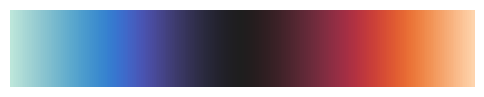

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import LogFormatter
import numpy as np
from scipy.stats import norm, chi2, uniform

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Get the 'icefire' colormap
cmap = sns.color_palette("icefire", as_cmap=True)

# Create a simple plot to visualize the colormap
fig, ax = plt.subplots(figsize=(6, 1))
gradient = np.linspace(0, 1, 256).reshape(1, -1)
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()
plt.show()

# Get a list of colors in the colormap and convert to hex codes
colors = sns.color_palette("icefire", n_colors=10) # Get 10 colors from the colormap
colors_hex = [mcolors.to_hex(color) for color in colors] # Store hex codes in a list called colors_hex

# sns.set_theme(style="white", palette=None)
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

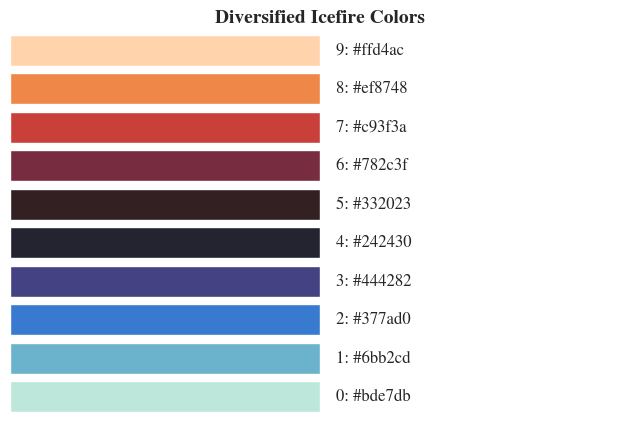

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

def visualize_color_palette(colors_hex, title="Selected Colors"):
    fig, ax = plt.subplots(figsize=(8, len(colors_hex) * 0.5))
    for i, hex_color in enumerate(colors_hex):
        ax.barh(i, 1, color=hex_color)
        ax.text(1.05, i, f'{i}: {hex_color}', va='center', fontsize=12)
    ax.set_xlim(0, 2)
    ax.set_ylim(-0.5, len(colors_hex) - 0.5)
    ax.axis('off')
    ax.set_title(title, fontsize=14, fontweight='bold')
    # plt.tight_layout()
    plt.show()

# Set style and fonts
sns.set_theme(style="whitegrid", palette=None)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

# Create diverse colors from the full icefire colormap
def get_diverse_icefire_colors(n):
    cmap = sns.color_palette("icefire", as_cmap=True)
    positions = np.linspace(0, 1, n)
    colors = [cmap(pos) for pos in positions]
    return colors, [mcolors.to_hex(c) for c in colors]

colors, colors_hex = get_diverse_icefire_colors(n=10)
visualize_color_palette(colors_hex, title="Diversified Icefire Colors")

# Assign specific colors to the horizontal reference lines
POORLY_CALIBRATED_COLOR = colors_hex[0]
WELL_CALIBRATED_COLOR = colors_hex[9]
UNDERCONFIDENCE_COLOR = colors_hex[5]

# Exclude light ends (0, 9) and dark bands (4, 5)
data_colors_hex = [
    color for i, color in enumerate(colors_hex)
    if i not in [0, 4, 5, 9]
]

In [53]:
PATH = '/content/drive/MyDrive/Pokie_Paper_Plot_Data'

In [54]:
def plot_pokie_alone(
    x,
    y,
    yerr,
    L,
    ax, # Now accepting an Axes object
    model_name=None,
    colors_hex=None,
    xlabel=None,
    ylabel='Pokie Score',
    table_number=None,
    xtick_labels=None,
    xtick_rotation=0,
    requested=False,
    LR=False,
    bbox_x=1.02,
    bbox_y=0.72,
    fig_size_x=10,
    fig_size_y=5,
    title=None,
    well_calibrated_color=None,
    poorly_calibrated_color=None,
    underconfidence_color=None,
    lw=5,
    fontsize = 20,
    markersize = 2,
    markeredgewidth= 2,
    elinewidth = 2,
    alpha = 0.5,
    capsize = 10,
    decrease_size = 2,
):
    x_label_font_size = fontsize
    y_label_font_size = fontsize
    tick_label_size = fontsize - decrease_size
    legend_font_size = fontsize - decrease_size
    
    ax.grid(False)
    if colors_hex is None:
        colors_hex = get_diverse_icefire_colors(10)[1]

    # Main error bar plot with tuned marker size --> iterate over colors_hex for different colors
    for i in range(len(x)):
        ax.errorbar(
            x[i], y[i], yerr=yerr[i], fmt='o',
            capsize=capsize,
            color=colors_hex[i % len(colors_hex)],  # Cycle through your color list
            markersize=markersize,
            alpha=1.0,
            markeredgewidth=markeredgewidth,
            elinewidth=elinewidth,
            label=model_name
        )
    # Add legend if specified
    # ax.legend(loc='upper right', bbox_to_anchor=(bbox_x, bbox_y), fontsize=15, frameon=False)
    # Horizontal lines (passed in explicitly)
    std = (1/18)/L
    if well_calibrated_color is not None:
        ax.axhline(2/3, color='black', linestyle='--', alpha = 1.0, lw=1.5, label='Well Calibrated')
        support = np.linspace(x[0]-0.5, x[-1]+0.5, 100)
        ax.fill_between(support, 2/3 - std, 2/3 + std, alpha=0.2, color='black')
    if poorly_calibrated_color is not None:
        ax.axhline(1/2, color='gray', linestyle='--', alpha = 1.0, lw=1.5, label='Poorly Calibrated')
    if underconfidence_color is not None:
        ax.axhline((1/2 + 1/np.sqrt(12)), color='gray', linestyle='--', alpha = 1.0, lw=1.5, label='Underconfident')



    # Font size tuning
    ax.set_title(title, fontsize=25, fontweight='bold') # Made title bold
    # Move title to the right
    ax.set_xlabel(xlabel, fontsize=x_label_size)
    ax.set_ylabel(ylabel, fontsize=y_label_size)
    ax.tick_params(axis='x', labelsize=x_tick_size) # Correct way to set tick label size
    ax.tick_params(axis='y', labelsize=y_tick_size) # Correct way to set tick label size

    # Format y-axis labels to two decimal places
    formatter = mpl.ticker.FormatStrFormatter('%.2f')
    ax.yaxis.set_major_formatter(formatter)

    # Set consistent y-axis limits
    # ax.set_ylim(0.48, 0.68)


    # Custom x-tick labels
    if LR:
        ax.set_xscale('log')  # Log spacing for better visual separation
        ax.set_xticks(ticks=x, labels=xtick_labels, rotation=45, fontsize=x_tick_size) # Corrected
    elif xtick_labels is not None:
        ax.set_xticks(ticks=x) # Corrected
        ax.set_xticklabels(xtick_labels, rotation=xtick_rotation, fontsize=x_tick_size) # Corrected


    if requested:
        ax.set_xlim(-0.3, len(x) - 0.7) # Corrected

    # Collect handles & labels
    handles, labels = ax.get_legend_handles_labels()

    # Deduplicate so calibration lines don’t repeat
    from collections import OrderedDict
    by_label = OrderedDict(zip(labels, handles))

    # Add legend once
    # Drop the first two entries (calibration lines) if they exist
    if 'Well Calibrated' in by_label:
        by_label.pop('Well Calibrated')
    if 'Poorly Calibrated' in by_label:
        by_label.pop('Poorly Calibrated')
    if 'Underconfident' in by_label:
        by_label.pop('Underconfident')
    ax.legend(
        by_label.values(), 
        by_label.keys(), 
        fontsize=legend_fontsize, 
        loc="upper right"
    )

In [66]:
def plot_scores_with_error_bars(
    x,
    y,
    yerr,
    ax, # Now accepting an Axes object
    colors_hex=None,
    xlabel=None,
    ylabel='Pokie Score',
    table_number=None,
    xtick_labels=None,
    xtick_rotation=0,
    requested=False,
    LR=False,
    bbox_x=1.02,
    bbox_y=0.72,
    fig_size_x=10,
    fig_size_y=5,
    title=None,
    add_legend=None,
    well_calibrated_color=None,
    poorly_calibrated_color=None,
    underconfidence_color=None,
    x_label_size=None,
    y_label_size=None,
    x_tick_size=None,
    y_tick_size=None,
    markersize=None,
    capsize=15,
    markeredgewidth=3.5,
    elinewidth=3.5,
):
    ax.grid(False)
    if colors_hex is None:
        colors_hex = get_diverse_icefire_colors(10)[1]

    # Main error bar plot with tuned marker size --> iterate over colors_hex for different colors
    for i in range(len(x)):
        ax.errorbar(
            x[i], y[i], yerr=yerr[i], fmt='o',
            capsize=capsize,
            color=colors_hex[i % len(colors_hex)],  # Cycle through your color list
            markersize=markersize,
            alpha=1.0,
            markeredgewidth=markeredgewidth,
            elinewidth=elinewidth
        )

    # Horizontal lines (passed in explicitly)
    if well_calibrated_color is not None:
        ax.axhline(2/3, color=well_calibrated_color, linestyle='--', alpha = 1.0, lw=5.5, label='Well Calibrated')
    if poorly_calibrated_color is not None:
        ax.axhline(1/2, color=poorly_calibrated_color, linestyle='--', alpha = 1.0, lw=5.5, label='Poorly Calibrated')
    if underconfidence_color is not None:
        ax.axhline((1/2 + 1/np.sqrt(12)), color=underconfidence_color, linestyle='--', alpha = 1.0, lw=5.5, label='Underconfident')
    # Font size tuning
    ax.set_title(title, fontsize=25, fontweight='bold') # Made title bold
    # Move title to the right
    ax.set_xlabel(xlabel, fontsize=x_label_size)
    ax.set_ylabel(ylabel, fontsize=y_label_size)
    ax.tick_params(axis='x', labelsize=x_tick_size) # Correct way to set tick label size
    ax.tick_params(axis='y', labelsize=y_tick_size) # Correct way to set tick label size

    # Format y-axis labels to two decimal places
    formatter = mpl.ticker.FormatStrFormatter('%.2f')
    ax.yaxis.set_major_formatter(formatter)

    # Set consistent y-axis limits
    # ax.set_ylim(0.48, 0.68)


    # Custom x-tick labels
    if LR:
        ax.set_xscale('log')  # Log spacing for better visual separation
        ax.set_xticks(ticks=x, labels=xtick_labels, rotation=45, fontsize=x_tick_size) # Corrected
    elif xtick_labels is not None:
        ax.set_xticks(ticks=x) # Corrected
        ax.set_xticklabels(xtick_labels, rotation=xtick_rotation, fontsize=x_tick_size) # Corrected


    if requested:
        ax.set_xlim(-0.3, len(x) - 0.7) # Corrected

In [65]:
def plot_validation_result(
    ax=None,
    pqmass_check=False,
    tarp_check=False,
    pqmass_data=None,
    tarp_datasets=None,
    data_colors_hex=None,
    x_label_size=None,
    y_label_size=None,
    x_tick_size=None,
    y_tick_size=None,
    lw=None,
    legend_fontsize=None,
    chi_2_line_width=None,
    pqm_chi2_line_width=None,
    prior_misspecificatopn=False,
):
    """
    Flexible plotting function for PQMass and TARP experiments.

    Parameters
    ----------
    ax : matplotlib.Axes
        Axes to draw on (if None, a new one will be created).
    pqmass_check : bool
        If True, plot PQMass results (requires pqmass_data).
    tarp_check : bool
        If True, plot TARP-style calibration results (requires tarp_datasets).
    pqmass_data : dict
        Dictionary containing PQMass data, with keys for each shift.
        Example:
            {
                -6: np.load(...),
                -3: np.load(...),
                 0: np.load(...),
                 3: np.load(...),
                 6: np.load(...)
            }
    tarp_datasets : dict
        Dictionary of datasets to plot. Keys are labels, values are dicts:
            {
                "Dataset name": {
                    "alpha": np.array([...]),
                    "ecp_mean": np.array([...]),
                    "ecp_std": np.array([...])
                },
                ...
            }
    data_colors_hex : list
        List of colors to cycle through.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))

    ax.grid(False)
    x_label_font_size = x_label_size
    y_label_font_size = y_label_size
    tick_label_size = x_tick_size

    if pqmass_check:
        if pqmass_data is None:
            raise ValueError("pqmass_check=True but pqmass_data not provided.")

        # Chi2 reference curve
        x_vals = np.linspace(60, 160, 100)
        ax.plot(x_vals, chi2.pdf(x_vals, df=99),
                lw=chi_2_line_width, label=r'$\chi^2_{\mathrm{ideal}}$', color='red')

        # Plot histograms for each shift
        for i, (shift, npz) in enumerate(pqmass_data.items()):
            zs = np.concatenate(npz["zs"])
            ax.hist(
                zs, bins=35, density=True,
                label=f"Shift: {shift}",
                alpha=0.6 if shift != 0 else 1.0,
                color=data_colors_hex[i % len(data_colors_hex)],
                histtype='stepfilled',
                linewidth=pqm_chi2_line_width
            )

        ax.set_xlabel(r'$\chi^2_{{\rm PQM}}$', fontsize=x_label_font_size)
        ax.set_ylabel("Frequency", fontsize=y_label_font_size)
        ax.tick_params(axis="both", labelsize=tick_label_size)
        ax.legend(bbox_to_anchor=(0.5, 1),
                  borderaxespad=0., fontsize=legend_fontsize)

    elif tarp_check:
        if tarp_datasets is None:
            raise ValueError("tarp_check=True but tarp_datasets not provided.")

        # Ideal line
        ax.plot([0, 1], [0, 1], "k--", lw=7.5, label="Ideal")

        for i, (label, d) in enumerate(tarp_datasets.items()):
            color = data_colors_hex[i % len(data_colors_hex)]
            ax.fill_between(
                d["alpha"],
                d["ecp_mean"] - d["ecp_std"],
                d["ecp_mean"] + d["ecp_std"],
                alpha=0.2,
                color=color
            )
            ax.plot(d["alpha"], d["ecp_mean"], lw=lw,
                    label=label, color=color)

        ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
        ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.tick_params(axis="both", labelsize=tick_label_size)
        if prior_misspecificatopn:
            ax.legend(loc="lower right",
                    borderaxespad=0., fontsize=legend_fontsize)
        else:
            ax.legend(loc="upper left",
                      borderaxespad=0., fontsize=legend_fontsize)

    else:
        raise ValueError("Must specify either pqmass_check=True or tarp_check=True.")

In [57]:
# def plot_validation_result(
#         ax=None,
#         pqmass_check=False,
#         tarp_check=False,
#         linear_regression=False,
#         model_misspecification=False,
#         prior_and_noise_misspecification=False,
#         conditional_distribution=False,
#         data_colors_hex=None,
#         inverse_bench_black_hole_imaging=False,
#         inverse_bench_compressed_sensing_mri=False,
#         inverse_bench_linear_inverse_scattering=False
# ):  
#     ax.grid(False)
#     '''
#     Two Options
#     1. PQMass --> ONLY for Distribution shift right_axes[1]
#     2. TARP   --> ALL others
#     '''

#     x_label_font_size = 55
#     y_label_font_size = 55
#     tick_label_size = 50
    
#     if pqmass_check:
#         # Load Data 
#         pqmass_shift_neg6 = np.load('./GMM_PQMass/shift_neg_6.npz')
#         pqmass_shift_neg3 = np.load('./GMM_PQMass/shift_neg_3.npz')
#         pqmass_shift_0 = np.load('./GMM_PQMass/shift_zero.npz')
#         pqmass_shift_3 = np.load('./GMM_PQMass/shift_pos_3.npz')
#         pqmass_shift_6 = np.load('./GMM_PQMass/shift_pos_6.npz')

#         zs_neg6 = pqmass_shift_neg6['zs']
#         zs_neg3 = pqmass_shift_neg3['zs']
#         zs_0    = pqmass_shift_0['zs']
#         zs_3    = pqmass_shift_3['zs']
#         zs_6    = pqmass_shift_6['zs']

#         # Combine all zs_neg6 into one list
#         zs_neg6_combined = np.concatenate(zs_neg6)
#         zs_neg3_combined = np.concatenate(zs_neg3)
#         zs_0_combined = np.concatenate(zs_0)
#         zs_3_combined = np.concatenate(zs_3)
#         zs_6_combined = np.concatenate(zs_6)

#         if ax is None:
#             fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout
#         ax.plot(np.linspace(60, 160, 100), chi2.pdf(np.linspace(60, 160, 100), df=99), lw=1.5, label = r'$\chi^2_{\mathrm{ideal}}$',   color='red')

#         ax.hist(zs_neg6_combined, bins=35, density=True, label = 'Shift: -6', alpha = 0.6, color=data_colors_hex[0], histtype='stepfilled', linewidth=7.5)
#         ax.hist(zs_neg3_combined, bins=35, density=True, label = 'Shift: -3', alpha = 0.6, color=data_colors_hex[1], histtype='stepfilled', linewidth=7.5)
#         ax.hist(zs_0_combined, bins=35, density=True, label = 'Shift: 0', alpha = 1.0, color=data_colors_hex[2], histtype='stepfilled', linewidth=7.5)
#         ax.hist(zs_3_combined, bins=35, density=True, label = 'Shift: 3', alpha = 0.6, color=data_colors_hex[3], histtype='stepfilled', linewidth=7.5)
#         ax.hist(zs_6_combined, bins=35, density=True, label = 'Shift: 6', alpha = 0.6, color=data_colors_hex[4], histtype='stepfilled', linewidth=7.5)
        
#         ax.set_xlabel(r'$\chi^2_{{\rm PQM}}$', fontsize=x_label_font_size)
#         ax.set_ylabel('Frequency', fontsize=y_label_font_size)
#         ax.tick_params(axis='both', labelsize=tick_label_size)
#         ax.legend(
#                 bbox_to_anchor=(1.05, 1), 
#                 loc='upper left', 
#                 borderaxespad=0., 
#                 fontsize=40
#             )
#     else:
#         if linear_regression:
#             # Load saved TARP bootstrap data
#             lr_data = np.load('./LR_TARP_Bootstrap_Data/LR_TARP_Bootstrap_Data.npz')
#             alpha = lr_data['alpha']
#             noise_levels = lr_data['noise_levels']
#             ecp_means = lr_data['ecp_means']
#             ecp_stds = lr_data['ecp_stds']
            
#             # fig, ax = plt.subplots(figsize=(15, 6))
#             if ax is None:
#                 fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout
#             ax.plot([0, 1], [0, 1], 'k--', lw=7.5, label='Ideal')

#             for i in range(len(noise_levels)):
#                 label = f"Noise: {noise_levels[i]:.3f}"
#                 color = data_colors_hex[i % len(data_colors_hex)]
#                 ax.fill_between(alpha, ecp_means[i] - 1 * ecp_stds[i], ecp_means[i] + 1 * ecp_stds[i], alpha=0.3, color=color)
#                 ax.plot(alpha, ecp_means[i], lw=7.5, label=label, color=color)
                

#             ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
#             ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
#             ax.set_xlim(0, 1)
#             ax.set_ylim(0, 1)
#             ax.tick_params(axis='both', labelsize=tick_label_size)
#             ax.legend(
#                 bbox_to_anchor=(1.05, 1), 
#                 loc='upper left', 
#                 borderaxespad=0., 
#                 fontsize=40
#             )
#             # plt.tight_layout()
            
#             pass
#         elif model_misspecification:
#             model_misspecification_data = np.load('model_misspecification_tarp_data.npz')
#             print(model_misspecification_data.files)
#             epl_3sersic_alpha = model_misspecification_data['EPL + 3 sources_alpha']
#             epl_3sersic_mean_ecp = model_misspecification_data['EPL + 3 sources_ecp_mean']
#             epl_3sersic_std_ecp = model_misspecification_data['EPL + 3 sources_ecp_std']
#             epl_1sersic_alpha = model_misspecification_data['EPL + 1 sources_alpha']
#             epl_1sersic_mean_ecp = model_misspecification_data['EPL + 1 sources_ecp_mean']
#             epl_1sersic_std_ecp = model_misspecification_data['EPL + 1 sources_ecp_std']
#             sie_3sersic_alpha = model_misspecification_data['SIE + 3 sources_alpha']
#             sie_3sersic_mean_ecp = model_misspecification_data['SIE + 3 sources_ecp_mean']
#             sie_3sersic_std_ecp = model_misspecification_data['SIE + 3 sources_ecp_std']
#             sie_1sersic_alpha = model_misspecification_data['SIE + 1 sources_alpha']
#             sie_1sersic_mean_ecp = model_misspecification_data['SIE + 1 sources_ecp_mean']
#             sie_1sersic_std_ecp = model_misspecification_data['SIE + 1 sources_ecp_std']

#             if ax is None:
#                 fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout
#             ax.plot([0, 1], [0, 1], 'k--', lw=7.5, label='Ideal')

#             ax.fill_between(epl_3sersic_alpha, epl_3sersic_mean_ecp - 1 * epl_3sersic_std_ecp, epl_3sersic_mean_ecp + 1 * epl_3sersic_std_ecp, alpha=0.2, color=data_colors_hex[0])
#             ax.plot(epl_3sersic_alpha, epl_3sersic_mean_ecp, lw=7.5, label='EPL + 3 Sources', color=data_colors_hex[0])
            
#             ax.fill_between(epl_1sersic_alpha, epl_1sersic_mean_ecp - 1 * epl_1sersic_std_ecp, epl_1sersic_mean_ecp + 1 * epl_1sersic_std_ecp, alpha=0.2, color=data_colors_hex[1])
#             ax.plot(epl_1sersic_alpha, epl_1sersic_mean_ecp, lw=7.5, label='EPL + 1 Source', color=data_colors_hex[1])
            
#             ax.fill_between(sie_3sersic_alpha, sie_3sersic_mean_ecp - 1 * sie_3sersic_std_ecp, sie_3sersic_mean_ecp + 1 * sie_3sersic_std_ecp, alpha=0.2, color=data_colors_hex[2])
#             ax.plot(sie_3sersic_alpha, sie_3sersic_mean_ecp, lw=7.5, label='SIE + 3 Sources', color=data_colors_hex[2])
            
    
#             ax.fill_between(sie_1sersic_alpha, sie_1sersic_mean_ecp - 1 * sie_1sersic_std_ecp, sie_1sersic_mean_ecp + 1 * sie_1sersic_std_ecp, alpha=0.2, color=data_colors_hex[3])
#             ax.plot(sie_1sersic_alpha, sie_1sersic_mean_ecp, lw=7.5, label='SIE + 1 Source', color=data_colors_hex[3])

#             ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
#             ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
#             ax.set_xlim(0, 1)
#             ax.set_ylim(0, 1)
#             ax.tick_params(axis='both', labelsize=tick_label_size)
#             ax.legend(
#                 bbox_to_anchor=(1.05, 1), 
#                 loc='upper left', 
#                 borderaxespad=0., 
#                 fontsize=40
#             )
#         elif prior_and_noise_misspecification:
#             lensing_data = np.load('./Lensing_tarp_coverage_data.npz')
#             print(lensing_data.files)
#             posterior_1_ecp_mean = lensing_data['posterior_1_ecp_mean']
#             posterior_1_ecp_std = lensing_data['posterior_1_ecp_std']
#             posterior_1_alpha = lensing_data['posterior_1_alpha']
#             posterior_2_ecp_mean = lensing_data['posterior_2_ecp_mean']
#             posterior_2_ecp_std = lensing_data['posterior_2_ecp_std']
#             posterior_2_alpha = lensing_data['posterior_2_alpha']
#             posterior_3_ecp_mean = lensing_data['posterior_3_ecp_mean']
#             posterior_3_ecp_std = lensing_data['posterior_3_ecp_std']
#             posterior_3_alpha = lensing_data['posterior_3_alpha']
#             posterior_4_ecp_mean = lensing_data['posterior_4_ecp_mean']
#             posterior_4_ecp_std = lensing_data['posterior_4_ecp_std']
#             posterior_4_alpha = lensing_data['posterior_4_alpha']

#             if ax is None:
#                 fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

#             ax.plot([0, 1], [0, 1], 'k--', lw=7.5,label='Ideal')
#             ax.fill_between(posterior_1_alpha, posterior_1_ecp_mean - 1 * posterior_1_ecp_std, posterior_1_ecp_mean + 1 * posterior_1_ecp_std, alpha=0.2, color=data_colors_hex[0])  
#             ax.plot(posterior_1_alpha, posterior_1_ecp_mean, lw=7.5, alpha = 0.5, label='$p_s(x)$, $\sigma_{\eta}=2$', color=data_colors_hex[0])
            
#             ax.fill_between(posterior_2_alpha, posterior_2_ecp_mean - 1 * posterior_2_ecp_std, posterior_2_ecp_mean + 1 * posterior_2_ecp_std, alpha=0.2, color=data_colors_hex[1])
#             ax.plot(posterior_2_alpha, posterior_2_ecp_mean, '.-', lw=7.5, alpha = 0.5, label='$p_s(x)$, $\sigma_{\eta}=4$', color=data_colors_hex[1])

#             ax.fill_between(posterior_3_alpha, posterior_3_ecp_mean - 1 * posterior_3_ecp_std, posterior_3_ecp_mean + 1 * posterior_3_ecp_std, alpha=0.2, color=data_colors_hex[2])
#             ax.plot(posterior_3_alpha, posterior_3_ecp_mean, lw=7.5, alpha = 0.5, label='$p_m(x)$, $\sigma_{\eta}=2$', color=data_colors_hex[2])
            
#             ax.fill_between(posterior_4_alpha, posterior_4_ecp_mean - 1 * posterior_4_ecp_std, posterior_4_ecp_mean + 1 * posterior_4_ecp_std, alpha=0.2, color=data_colors_hex[3]) 
#             ax.plot(posterior_4_alpha, posterior_4_ecp_mean, '--', lw=7.5, alpha = 0.5, label='$p_m(x)$, $\sigma_{\eta}=4$', color=data_colors_hex[3])
             

#             ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
#             ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
#             ax.tick_params(axis='both', labelsize=tick_label_size)
#             ax.legend(
#                 bbox_to_anchor=(1.05, 1), 
#                 loc='upper left', 
#                 borderaxespad=0., 
#                 fontsize=40
#             )
#         elif conditional_distribution:
#             tarp_data = np.load('/Users/sammysharief/Downloads/TARP Plots Conditional Model/Tarp_Result_Averaged_Data.npz')
#             methods = ['conditional VAE\n', 'conditional Diffusion Model\n']
#             k_sigma = [3]

#             # Define common alpha grid (101 points between 0 and 1)
#             common_alpha = np.linspace(0, 1, 101)
#             common_alpha_ext = np.insert(common_alpha, 0, 0.0)
#             cvae_mean_ecp = tarp_data['cvae_mean_ecp']
#             cvae_std_ecp = tarp_data['cvae_std_ecp']
#             alpha = tarp_data['common_alpha']
#             cdm_mean_ecp = tarp_data['cdm_mean_ecp']
#             cdm_std_ecp = tarp_data['cdm_std_ecp']
#             # fig, axes = plt.subplots(figsize=(15, 6)
#             if ax is None:
#                 fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout
                
#             ax.fill_between(common_alpha_ext, cvae_mean_ecp - 3 * cvae_std_ecp, cvae_mean_ecp + 3 * cvae_std_ecp, alpha=0.2, color=data_colors_hex[0])
#             ax.plot(common_alpha_ext, cvae_mean_ecp, lw=7.5, label='Conditional\nVAE', color=data_colors_hex[0])
            
#             ax.fill_between(common_alpha_ext, cdm_mean_ecp - 3 * cdm_std_ecp, cdm_mean_ecp + 3 * cdm_std_ecp, alpha=0.2, color=data_colors_hex[1])
#             ax.plot(common_alpha_ext, cdm_mean_ecp, lw=7.5, label='Conditional\nDM', color=data_colors_hex[1])
            

#             ax.plot([0, 1], [0, 1], '--', lw=7.5, color='k', label='Ideal')

#             ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
#             ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
#             ax.tick_params(axis='both', labelsize=tick_label_size)
#             ax.set_xlim(0, 1)
#             ax.set_ylim(0, 1)
#             ax.legend(
#                 bbox_to_anchor=(1.05, 1), 
#                 loc='upper left', 
#                 borderaxespad=0., 
#                 fontsize=40
#             )
#         elif inverse_bench_black_hole_imaging:
#             bh_tarp_data = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/DAPS_tarp_results.npz')
#             print(bh_tarp_data.files)
#             daps_alpha = bh_tarp_data['alpha']
#             daps_mean_ecp = bh_tarp_data['ecp_mean']
#             daps_std_ecp = bh_tarp_data['ecp_std']

#             bh_tarp_diffpir = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/DiffPIR_tarp_results.npz')
#             print(bh_tarp_diffpir.files)
#             diffpir_alpha = bh_tarp_diffpir['alpha']
#             diffpir_mean_ecp = bh_tarp_diffpir['ecp_mean']
#             diffpir_std_ecp = bh_tarp_diffpir['ecp_std']
            
#             bh_tarp_dps = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/DPS_tarp_results.npz')
#             print(bh_tarp_dps.files)
#             dps_alpha = bh_tarp_dps['alpha']
#             dps_mean_ecp = bh_tarp_dps['ecp_mean']
#             dps_std_ecp = bh_tarp_dps['ecp_std']
            
#             bh_tarp_pnpdm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/PnPDM_tarp_results.npz')
#             print(bh_tarp_pnpdm.files)
#             pnpdm_alpha = bh_tarp_pnpdm['alpha']
#             pnpdm_mean_ecp = bh_tarp_pnpdm['ecp_mean']
#             pnpdm_std_ecp = bh_tarp_pnpdm['ecp_std']
            
#             bh_tarp_reddiff = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/REDDiff_tarp_results.npz')
#             print(bh_tarp_reddiff.files)
#             reddiff_alpha = bh_tarp_reddiff['alpha']
#             reddiff_mean_ecp = bh_tarp_reddiff['ecp_mean']
#             reddiff_std_ecp = bh_tarp_reddiff['ecp_std']
  
#             if ax is None:
#                 fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

#             ax.plot([0, 1], [0, 1], 'k--', lw=7.5,label='Ideal')

#             ax.fill_between(daps_alpha, daps_mean_ecp - 1 * daps_std_ecp, daps_mean_ecp + 1 * daps_std_ecp, alpha=0.2, color=data_colors_hex[0])
#             ax.plot(daps_alpha, daps_mean_ecp, lw=7.5, label='DAPS', color=data_colors_hex[0])  

#             ax.fill_between(diffpir_alpha, diffpir_mean_ecp - 1 * diffpir_std_ecp, diffpir_mean_ecp + 1 * diffpir_std_ecp, alpha=0.2, color=data_colors_hex[1])
#             ax.plot(diffpir_alpha, diffpir_mean_ecp, lw=7.5, label='DiffPIR', color=data_colors_hex[1]) 

#             ax.fill_between(dps_alpha, dps_mean_ecp - 1 * dps_std_ecp, dps_mean_ecp + 1 * dps_std_ecp, alpha=0.2, color=data_colors_hex[2])
#             ax.plot(dps_alpha, dps_mean_ecp, lw=7.5, label='DPS', color=data_colors_hex[2])

#             ax.fill_between(pnpdm_alpha, pnpdm_mean_ecp - 1 * pnpdm_std_ecp, pnpdm_mean_ecp + 1 * pnpdm_std_ecp, alpha=0.2, color=data_colors_hex[3])
#             ax.plot(pnpdm_alpha, pnpdm_mean_ecp, lw=7.5, label='PnPDM', color=data_colors_hex[3])

#             ax.fill_between(reddiff_alpha, reddiff_mean_ecp - 1 * reddiff_std_ecp, reddiff_mean_ecp + 1 * reddiff_std_ecp, alpha=0.2, color=data_colors_hex[4])
#             ax.plot(reddiff_alpha, reddiff_mean_ecp, lw=7.5, label='REDDiff', color=data_colors_hex[4])

#             ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
#             ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
#             ax.set_xlim(0, 1)
#             ax.set_ylim(-0.05, 1)
#             ax.tick_params(axis='both', labelsize=tick_label_size)
#             ax.legend(
#                 bbox_to_anchor=(1.05, 1), 
#                 loc='upper left', 
#                 borderaxespad=0., 
#                 fontsize=40
#             )

#         elif inverse_bench_compressed_sensing_mri:
#             csmritarp_data = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DAPS_tarp_results.npz')
#             daps_alpha = csmritarp_data['alpha']
#             daps_mean_ecp = csmritarp_data['ecp_mean']
#             daps_std_ecp = csmritarp_data['ecp_std']

#             csmritarp_diffpir = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DiffPIR_tarp_results.npz')
#             diffpir_alpha = csmritarp_diffpir['alpha']
#             diffpir_mean_ecp = csmritarp_diffpir['ecp_mean']
#             diffpir_std_ecp = csmritarp_diffpir['ecp_std']
            
#             csmritarp_dps = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DPS_tarp_results.npz')
#             dps_alpha = csmritarp_dps['alpha']
#             dps_mean_ecp = csmritarp_dps['ecp_mean']
#             dps_std_ecp = csmritarp_dps['ecp_std']
            
#             csmritarp_pnpdm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/PnPDM_tarp_results.npz')
#             pnpdm_alpha = csmritarp_pnpdm['alpha']
#             pnpdm_mean_ecp = csmritarp_pnpdm['ecp_mean']
#             pnpdm_std_ecp = csmritarp_pnpdm['ecp_std']
            
#             csmritarp_reddiff = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/REDDiff_tarp_results.npz')
#             reddiff_alpha = csmritarp_reddiff['alpha']
#             reddiff_mean_ecp = csmritarp_reddiff['ecp_mean']
#             reddiff_std_ecp = csmritarp_reddiff['ecp_std']
  
#             if ax is None:
#                 fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

#             ax.plot([0, 1], [0, 1], 'k--', lw=7.5,label='Ideal')

#             ax.fill_between(daps_alpha, daps_mean_ecp - 1 * daps_std_ecp, daps_mean_ecp + 1 * daps_std_ecp, alpha=0.2, color=data_colors_hex[0])
#             ax.plot(daps_alpha, daps_mean_ecp, lw=7.5, label='DAPS', color=data_colors_hex[0])  

#             ax.fill_between(diffpir_alpha, diffpir_mean_ecp - 1 * diffpir_std_ecp, diffpir_mean_ecp + 1 * diffpir_std_ecp, alpha=0.2, color=data_colors_hex[1])
#             ax.plot(diffpir_alpha, diffpir_mean_ecp, lw=7.5, label='DiffPIR', color=data_colors_hex[1]) 

#             ax.fill_between(dps_alpha, dps_mean_ecp - 1 * dps_std_ecp, dps_mean_ecp + 1 * dps_std_ecp, alpha=0.2, color=data_colors_hex[2])
#             ax.plot(dps_alpha, dps_mean_ecp, lw=7.5, label='DPS', color=data_colors_hex[2])

#             ax.fill_between(pnpdm_alpha, pnpdm_mean_ecp - 1 * pnpdm_std_ecp, pnpdm_mean_ecp + 1 * pnpdm_std_ecp, alpha=0.2, color=data_colors_hex[3])
#             ax.plot(pnpdm_alpha, pnpdm_mean_ecp, lw=7.5, label='PnPDM', color=data_colors_hex[3])

#             ax.fill_between(reddiff_alpha, reddiff_mean_ecp - 1 * reddiff_std_ecp, reddiff_mean_ecp + 1 * reddiff_std_ecp, alpha=0.2, color=data_colors_hex[4])
#             ax.plot(reddiff_alpha, reddiff_mean_ecp, lw=7.5, label='REDDiff', color=data_colors_hex[4])

#             ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
#             ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
#             ax.set_xlim(0, 1)
#             ax.set_ylim(-0.05, 1)
#             ax.tick_params(axis='both', labelsize=tick_label_size)
#             ax.legend(
#                 bbox_to_anchor=(1.05, 1), 
#                 loc='upper left', 
#                 borderaxespad=0., 
#                 fontsize=40
#             )
        
#         elif inverse_bench_linear_inverse_scattering:
#             csmritarp_data = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DAPS_tarp_results.npz')
#             daps_alpha = csmritarp_data['alpha']
#             daps_mean_ecp = csmritarp_data['ecp_mean']
#             daps_std_ecp = csmritarp_data['ecp_std']

#             csmritarp_ddrm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DDRM_tarp_results.npz')
#             ddrm_alpha = csmritarp_ddrm['alpha']
#             ddrm_mean_ecp = csmritarp_ddrm['ecp_mean']
#             ddrm_std_ecp = csmritarp_ddrm['ecp_std']

#             csmritarp_ddnm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DDNM_tarp_results.npz')
#             ddnm_alpha = csmritarp_ddnm['alpha']
#             ddnm_mean_ecp = csmritarp_ddnm['ecp_mean']
#             ddnm_std_ecp = csmritarp_ddnm['ecp_std']

#             csmritarp_pigdm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/PIGDM_tarp_results.npz')
#             pigdm_alpha = csmritarp_pigdm['alpha']
#             pigdm_mean_ecp = csmritarp_pigdm['ecp_mean']
#             pigdm_std_ecp = csmritarp_pigdm['ecp_std']

#             csmritarp_diffpir = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DiffPIR_tarp_results.npz')
#             diffpir_alpha = csmritarp_diffpir['alpha']
#             diffpir_mean_ecp = csmritarp_diffpir['ecp_mean']
#             diffpir_std_ecp = csmritarp_diffpir['ecp_std']

#             csmritarp_dps = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DPS_tarp_results.npz')
#             dps_alpha = csmritarp_dps['alpha']
#             dps_mean_ecp = csmritarp_dps['ecp_mean']
#             dps_std_ecp = csmritarp_dps['ecp_std']

#             csmritarp_pnpdm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/PnPDM_tarp_results.npz')
#             pnpdm_alpha = csmritarp_pnpdm['alpha']
#             pnpdm_mean_ecp = csmritarp_pnpdm['ecp_mean']
#             pnpdm_std_ecp = csmritarp_pnpdm['ecp_std']

#             csmritarp_reddiff = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/REDDiff_tarp_results.npz')
#             reddiff_alpha = csmritarp_reddiff['alpha']
#             reddiff_mean_ecp = csmritarp_reddiff['ecp_mean']
#             reddiff_std_ecp = csmritarp_reddiff['ecp_std']

#             if ax is None:
#                 fig, ax = plt.subplots(figsize=(15, 6))  # fallback if called outside main layout

#             ax.plot([0, 1], [0, 1], 'k--', lw=7.5,label='Ideal')

#             ax.fill_between(daps_alpha, daps_mean_ecp - 1 * daps_std_ecp, daps_mean_ecp + 1 * daps_std_ecp, alpha=0.2, color=data_colors_hex[0])
#             ax.plot(daps_alpha, daps_mean_ecp, lw=7.5, label='DAPS', color=data_colors_hex[0])  

#             ax.fill_between(ddrm_alpha, ddrm_mean_ecp - 1 * ddrm_std_ecp, ddrm_mean_ecp + 1 * ddrm_std_ecp, alpha=0.2, color=data_colors_hex[1])
#             ax.plot(ddrm_alpha, ddrm_mean_ecp, lw=7.5, label='DDRM', color=data_colors_hex[1])

#             ax.fill_between(ddnm_alpha, ddnm_mean_ecp - 1 * ddnm_std_ecp, ddnm_mean_ecp + 1 * ddnm_std_ecp, alpha=0.2, color=data_colors_hex[2])
#             ax.plot(ddnm_alpha, ddnm_mean_ecp, lw=7.5, label='DDNM', color=data_colors_hex[2])

#             ax.fill_between(pigdm_alpha, pigdm_mean_ecp - 1 * pigdm_std_ecp, pigdm_mean_ecp + 1 * pigdm_std_ecp, alpha=0.2, color=data_colors_hex[3])
#             ax.plot(pigdm_alpha, pigdm_mean_ecp, lw=7.5, label=r'$\pi\text{GDM}$', color=data_colors_hex[3])

#             ax.fill_between(diffpir_alpha, diffpir_mean_ecp - 1 * diffpir_std_ecp, diffpir_mean_ecp + 1 * diffpir_std_ecp, alpha=0.2, color=data_colors_hex[1])
#             ax.plot(diffpir_alpha, diffpir_mean_ecp, lw=7.5, label='DiffPIR', color=data_colors_hex[1]) 

#             ax.fill_between(dps_alpha, dps_mean_ecp - 1 * dps_std_ecp, dps_mean_ecp + 1 * dps_std_ecp, alpha=0.2, color=data_colors_hex[2])
#             ax.plot(dps_alpha, dps_mean_ecp, lw=7.5, label='DPS', color=data_colors_hex[2])

#             ax.fill_between(pnpdm_alpha, pnpdm_mean_ecp - 1 * pnpdm_std_ecp, pnpdm_mean_ecp + 1 * pnpdm_std_ecp, alpha=0.2, color=data_colors_hex[3])
#             ax.plot(pnpdm_alpha, pnpdm_mean_ecp, lw=7.5, label='PnPDM', color=data_colors_hex[3])

#             ax.fill_between(reddiff_alpha, reddiff_mean_ecp - 1 * reddiff_std_ecp, reddiff_mean_ecp + 1 * reddiff_std_ecp, alpha=0.2, color=data_colors_hex[4])
#             ax.plot(reddiff_alpha, reddiff_mean_ecp, lw=7.5, label='REDDiff', color=data_colors_hex[4])

#             ax.set_xlabel("Credibility Level", fontsize=x_label_font_size)
#             ax.set_ylabel("Expected Coverage", fontsize=y_label_font_size)
#             ax.set_xlim(0, 1)
#             ax.set_ylim(-0.05, 1)
#             ax.tick_params(axis='both', labelsize=tick_label_size)
#             ax.legend(
#                 bbox_to_anchor=(1.05, 1), 
#                 loc='upper left', 
#                 borderaxespad=0., 
#                 fontsize=35
#             )


In [58]:
# # Create a 5x2 grid of subplots (1 row per experiment)
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))

# # Loop through only the LEFT column of each row
# left_axes = [axes[i, 0] for i in range(5)]
# right_axes = [axes[i, 1] for i in range(5)]

# # Optional: Turn off the right axes (you'll populate them later)
# for ax in right_axes:
#     ax.axis('off')

# # Plot 1: Linear Regression
# noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]
# scores = [0.6670, 0.6417, 0.5669, 0.5589, 0.5548, 0.5517]
# errors = [0.0011, 0.0020, 0.0005, 0.0009, 0.0009, 0.0009]

# plot_scores_with_error_bars(
#     x=np.arange(len(noise_levels)),
#     y=scores,
#     ax=left_axes[0],  # Pass the first subplot Axes object
#     yerr=errors,
#     xtick_labels=['0.001', '0.01', '0.1', '0.15', '0.2', '0.25'],  # <- manually override
#     xtick_rotation=45,
#     xlabel='Noise Level',
#     ylabel='Pokie Score',
#     table_number='Table_1',
#     LR=False,
#     title = 'Linear Regression'
# )

# # Plot 1: Linear Regression → TARP (Right Side)
# right_axes[0].axis('on')  # Activate if not already
# plot_validation_result(
#     ax=right_axes[0],
#     linear_regression=True
# )

# ''' 
# GMM
# '''

# # Plot 2: Table GMM Results
# model_shifts = [-6, -3, 0, 3, 6]
# scores = [0.5002, 0.5115, 0.6669, 0.5156, 0.5000]
# errors = [0.0003, 0.0006, 0.0003, 0.0003, 0.0004]

# plot_scores_with_error_bars(
#     x=model_shifts,
#     y=scores,
#     ax=left_axes[1],  # Pass the second subplot Axes object
#     yerr=errors,
#     xtick_labels=model_shifts,
#     xlabel='Model Shift',
#     ylabel='Pokie Score',
#     table_number='Table_GMM',
#     bbox_x = 1.02,
#     bbox_y = 0.90,
#     title='Distribution Shift'
#     # title='Pokie Score vs Model Shift'
# )

# # Plot 2: GMM → PQMass (Right Side)
# right_axes[1].axis('on')  # Activate if not already
# plot_validation_result(
#     ax=right_axes[1],
#     pqmass_check=True
# )

# '''
# CONDITIONAL DISTRIBUTION
# '''

# # Plot 3: Table Conditional Distribution Results
# models = ["Conditional\nDiffusion Model", "Conditional\nVAE"]
# # scores = [0.5653, 0.6576]
# # errors = [0.0052, 0.0040]

# scores = [0.6576, 0.5653]
# errors = [0.0040, 0.0052]

# plot_scores_with_error_bars(
#     x=range(len(models)),  # Use index for x-axis
#     y=scores,
#     yerr=errors,
#     ax=left_axes[2],  # Pass the second subplot Axes object
#     # xlabel='Model',
#     ylabel='Pokie Score',
#     xtick_labels=models,
#     xtick_rotation=0,
#     table_number='Table_Cond_Dist',
#     requested=True,
#     title = 'Conditional Distribution',
# )


# # Plot 3: Conditional Distribution → TARP (Right Side)
# right_axes[2].axis('on')  # Activate if not already
# plot_validation_result(
#     ax=right_axes[2],
#     conditional_distribution=True
# )


# '''
# Model Misspecification
# '''

# # Plot 4: Model Misspecification
# models = [
#     "EPL + 3\nSersic Sources",
#     "SIE + 3\nSersic Sources",
#     "EPL + 1\nSersic Sources",
#     "SIE + 1\nSersic Sources"
# ]
# scores = [0.6297, 0.5777, 0.5277, 0.5267]
# errors = [0.0054, 0.0027, 0.0028, 0.0031]

# plot_scores_with_error_bars(
#     x=range(len(models)),  # Use index for x-axis
#     y=scores,
#     yerr=errors,
#     ax=left_axes[3],  # Pass the second subplot Axes object
#     ylabel='Pokie Score',
#     xtick_labels=models,
#     xtick_rotation=30,
#     table_number='Model_Misspecification',
#     title='Model Misspecification',
# )

# # Plot 3: Conditional Distribution → TARP (Right Side)
# right_axes[3].axis('on')  # Activate if not already
# plot_validation_result(
#     ax=right_axes[3],
#     model_misspecification=True
# )


# # Plot 5: Prior and Noise Misspecification
# conditions = [
#     r"$p_s(x)$" + "\n" + r"$\sigma_{\eta}=2$",
#     r"$p_s(x)$" + "\n" + r"$\sigma_{\eta}=0.5$",
#     r"$p_e(x)$" + "\n" + r"$\sigma_{\eta}=2$",
#     r"$p_e(x)$" + "\n" + r"$\sigma_{\eta}=0.5$"
# ]
# scores = [0.6518, 0.5728, 0.5214, 0.5085]
# errors = [0.0369, 0.0089, 0.0168, 0.0069]

# plot_scores_with_error_bars(
#     x=range(len(conditions)),  # Use index for x-axis
#     y=scores,
#     yerr=errors,
#     ax=left_axes[4],  # Pass the second subplot Axes object

#     xlabel='Prior and Noise Level',
#     ylabel='Pokie Score',
#     xtick_labels=conditions,
#     xtick_rotation=0,
#     table_number='Table_Lensed_Images',
#     bbox_x = 1.02,
#     bbox_y = 0.87,
#     title='Prior & Noise Misspecification',
# )

# # Plot 3: Prior and Noise Misspecification → TARP (Right Side)
# right_axes[4].axis('on')  # Activate if not already
# plot_validation_result(
#     ax=right_axes[4],
#     prior_and_noise_misspecification=True
# )


# # plt.tight_layout()
# plt.subplots_adjust(wspace=0.35, hspace=0.5)
# plt.savefig('pokie_experiment_1.pdf')

In [67]:
# FONTSIZE = 20
# LW = 1.5
# ALPHA = 0.9
# MARKERDGEWIDTH = 1.5
# MARKERSIZE = 8
# ELINEWIDTH = 2
# CAPSIZE = 10
# DECREASE_SIZE = 4
# L = 100

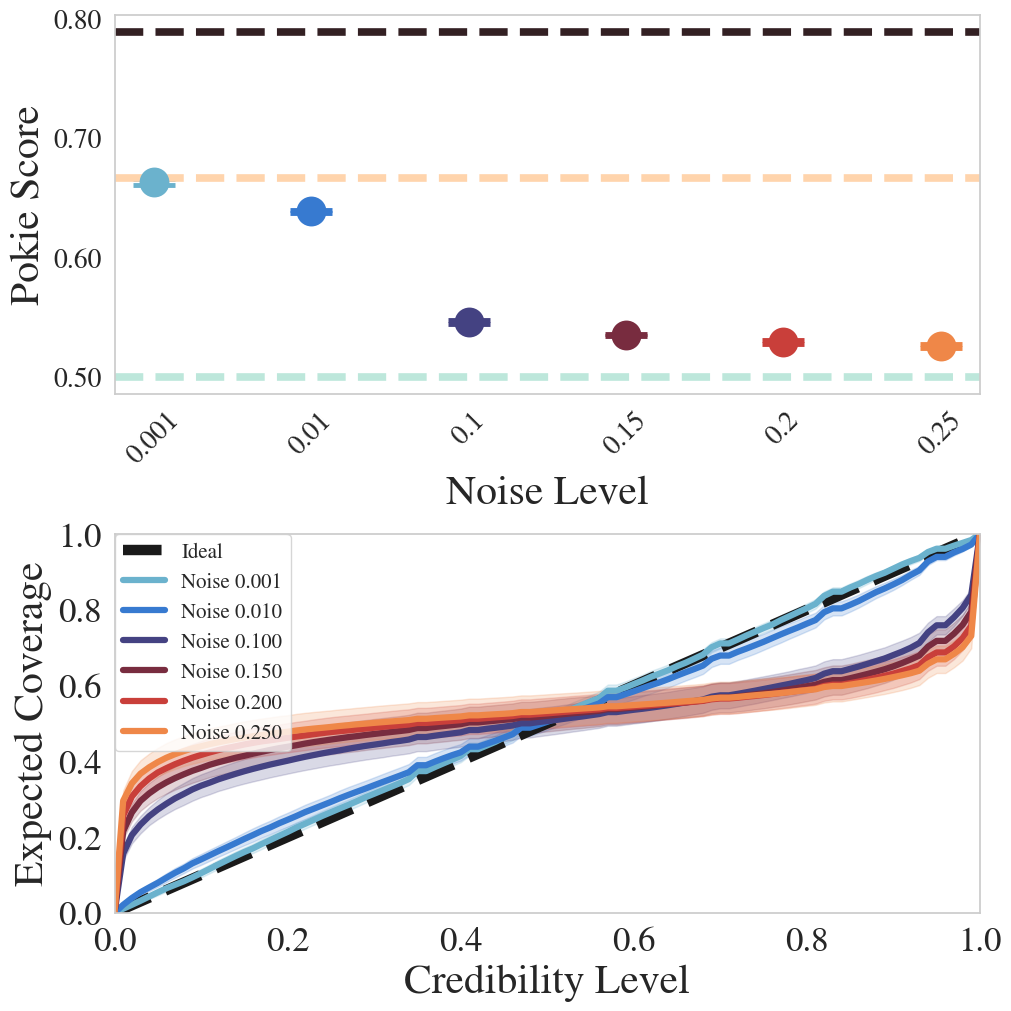

In [68]:
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]
scores = [0.6634, 0.6387, 0.5459, 0.5350, 0.5292, 0.5258]
errors = [0.0026, 0.0011, 0.0016, 0.0011, 0.0015, 0.0018]

fig1, axes1 = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10),  # width, height in inches
    # gridspec_kw={'hspace': 0.3}  # vertical spacing
)

top_ax, bottom_ax = axes1  # clearer names

plot_scores_with_error_bars(
    x=np.arange(len(noise_levels)),
    y=scores,
    ax=top_ax,
    colors_hex=data_colors_hex,
    yerr=errors,
    xtick_labels=['0.001', '0.01', '0.1', '0.15', '0.2', '0.25'],
    xtick_rotation=45,
    xlabel='Noise Level',
    ylabel='Pokie Score',
    table_number='Table_1',
    LR=False,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    underconfidence_color=UNDERCONFIDENCE_COLOR,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=20,
    y_tick_size=20,
    markersize=18,
)

# Load linear regression TARP data
lr_data = np.load('./LR_TARP_Bootstrap_Data/LR_TARP_Bootstrap_Data.npz')

tarp_datasets = {
    f"Noise {nl:.3f}": {
        "alpha": lr_data["alpha"],
        "ecp_mean": lr_data["ecp_means"][i],
        "ecp_std": lr_data["ecp_stds"][i]
    }
    for i, nl in enumerate(lr_data["noise_levels"])
}

# Now call with tarp_check=True and pass datasets
plot_validation_result(
    ax=bottom_ax,
    tarp_check=True,
    tarp_datasets=tarp_datasets,
    data_colors_hex=data_colors_hex,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=25,
    y_tick_size=25,
    lw=4.5,
    legend_fontsize=15)


fig1.set_constrained_layout(True)
fig1.savefig('./PDF_Plots/Linear_Regression_Result.pdf')
fig1.savefig('./PNG_Plots/Linear_Regression_Result.png', dpi=300)

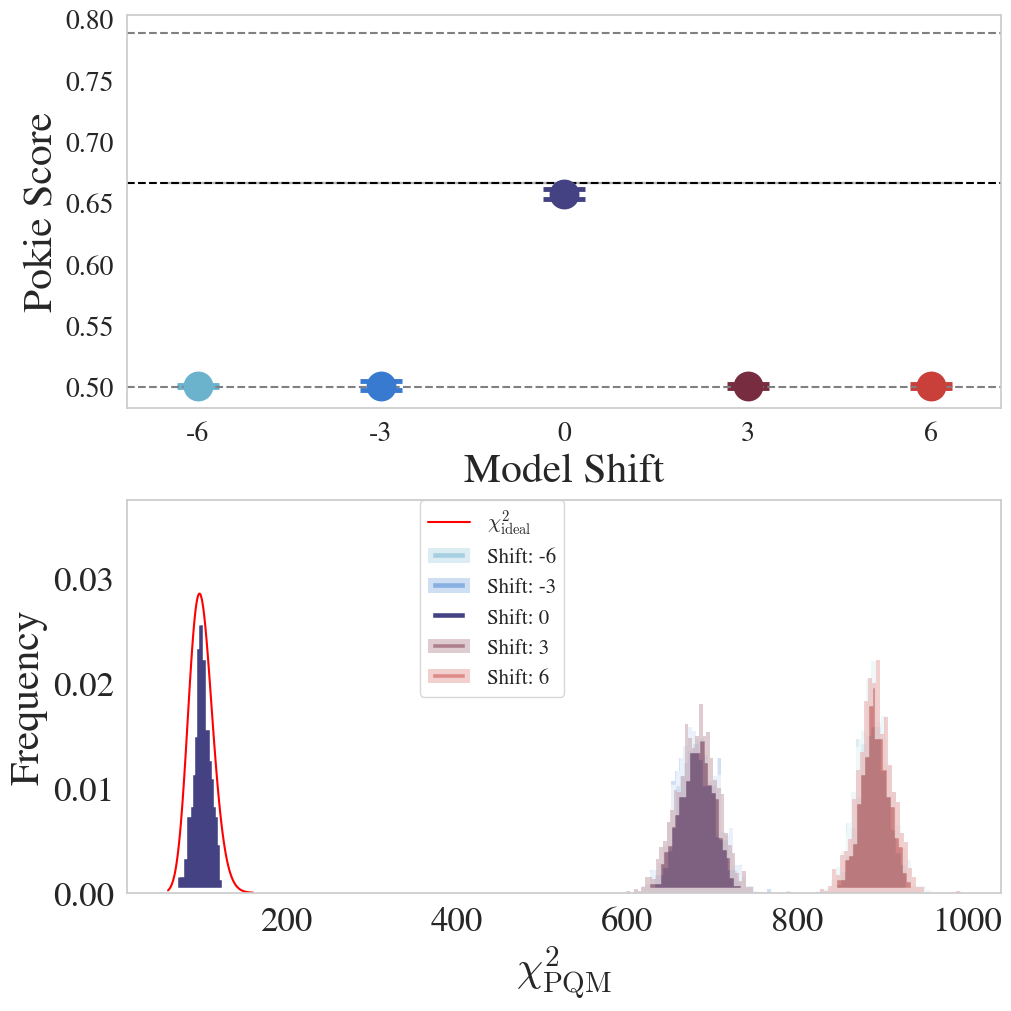

In [9]:
model_shifts = [-6, -3, 0, 3, 6]
scores = [0.5011, 0.5012, 0.6572, 0.5011, 0.5009]
errors = [0.0008, 0.0038, 0.0041, 0.0014, 0.0016]

fig2, axes2 = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10), 
    # gridspec_kw={'hspace': 0.3}  # vertical spacing
)

left_ax2, right_ax2 = axes2

plot_scores_with_error_bars(
    x=model_shifts,
    y=scores,
    ax=left_ax2,
    yerr=errors,
    xtick_labels=model_shifts,
    xlabel='Model Shift',
    ylabel='Pokie Score',
    table_number='Table_GMM',
    bbox_x=1.02,
    bbox_y=0.90,
    # title='Distribution Shift',
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    underconfidence_color=UNDERCONFIDENCE_COLOR,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=20,
    y_tick_size=20,
    markersize=18,
)
# fig2.suptitle('Distribution Shift', fontsize=60, fontweight='bold', y=1.00)  # adjust `y` as needed

pqmass_data = {
    -6: np.load('./GMM_PQMass/shift_neg_6.npz'),
    -3: np.load('./GMM_PQMass/shift_neg_3.npz'),
     0: np.load('./GMM_PQMass/shift_zero.npz'),
     3: np.load('./GMM_PQMass/shift_pos_3.npz'),
     6: np.load('./GMM_PQMass/shift_pos_6.npz'),
}

plot_validation_result(
    ax=right_ax2,
    pqmass_check=True,
    pqmass_data=pqmass_data,
    data_colors_hex=data_colors_hex,
    chi_2_line_width=1.5,
    pqm_chi2_line_width=7.5,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=25,
    y_tick_size=25,
    lw=4.5,
    legend_fontsize=15)

fig2.set_constrained_layout(True)
fig2.savefig('./PDF_Plots/Distribution_Shift_Result.pdf')
fig2.savefig('./PNG_Plots/Distribution_Shift_Result.png', dpi=300)

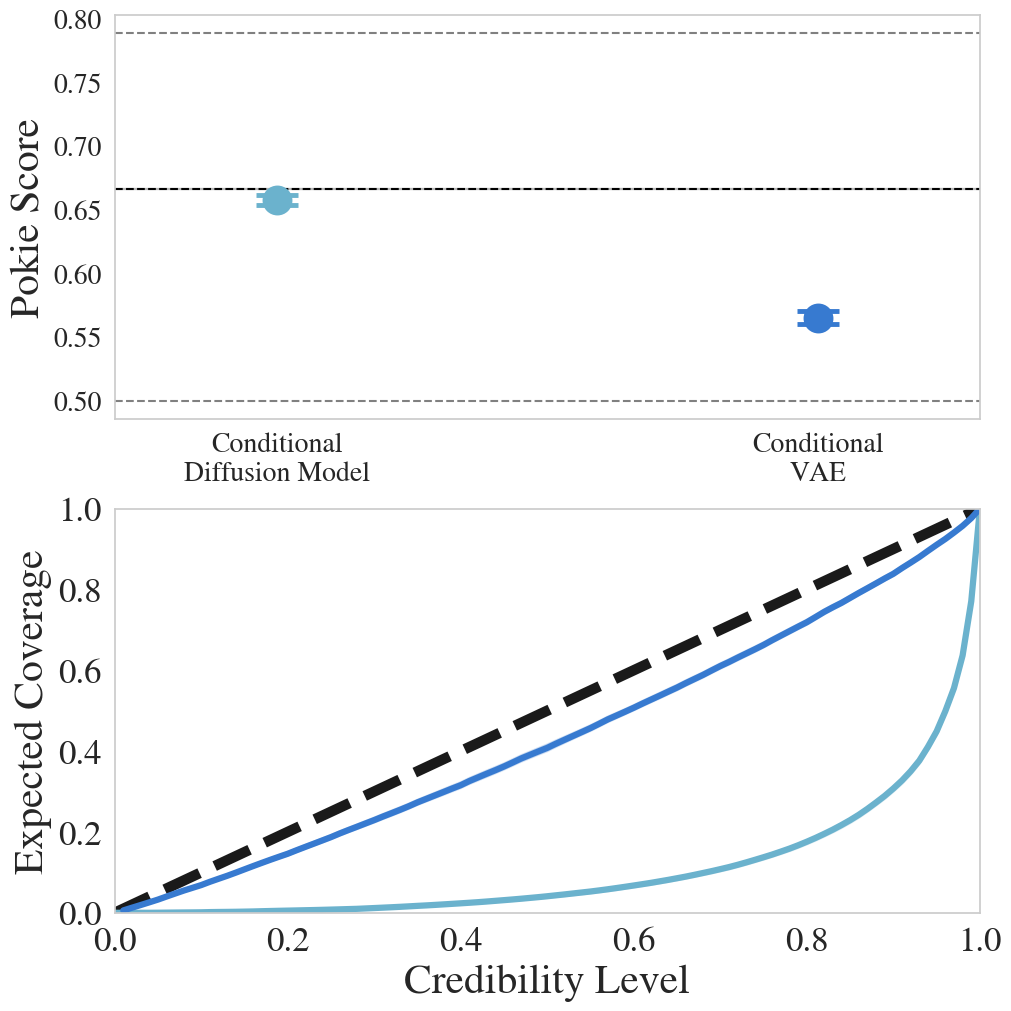

In [10]:
models = ["Conditional\nDiffusion Model", "Conditional\nVAE"]

scores = [0.6579, 0.5654]
errors = [0.0040, 0.0051]

fig3, axes3 = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10), 
    # gridspec_kw={'hspace': 0.3}  # vertical spacing
)

left_ax3, right_ax3 = axes3

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    ax=left_ax3,
    ylabel='Pokie Score',
    xtick_labels=models,
    xtick_rotation=0,
    table_number='Table_Cond_Dist',
    requested=True,
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    underconfidence_color=UNDERCONFIDENCE_COLOR,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=20,
    y_tick_size=20,
    markersize=18,
)

# Load conditional distribution TARP data
tarp_data = np.load('/Users/sammysharief/Downloads/TARP Plots Conditional Model/Tarp_Result_Averaged_Data.npz')
k_sigma = [3]

# Define common alpha grid (101 points between 0 and 1)
common_alpha = np.linspace(0, 1, 101)
common_alpha_ext = np.insert(common_alpha, 0, 0.0)
cvae_mean_ecp = tarp_data['cvae_mean_ecp']
cvae_std_ecp = tarp_data['cvae_std_ecp']
alpha = tarp_data['common_alpha']
cdm_mean_ecp = tarp_data['cdm_mean_ecp']
cdm_std_ecp = tarp_data['cdm_std_ecp']

# build tarp_datasets dictionary
tarp_datasets = {
    "Conditional VAE": {
        "alpha": alpha,
        "ecp_mean": cvae_mean_ecp,
        "ecp_std": cvae_std_ecp
    },
    "Conditional DM": {
        "alpha": alpha,
        "ecp_mean": cdm_mean_ecp,
        "ecp_std": cdm_std_ecp
    }
}

plot_validation_result(
    ax=right_ax3, 
    tarp_check=True, 
    tarp_datasets=tarp_datasets,
    data_colors_hex=data_colors_hex,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=25,
    y_tick_size=25,
    lw=4.5,
    legend_fontsize=25)

fig3.set_constrained_layout(True)
fig3.savefig('./PDF_Plots/Conditional_Distribution_Result.pdf')
fig3.savefig('./PNG_Plots/Conditional_Distribution_Result.png', dpi=300)

['EPL + 3 sources_ecp_mean', 'EPL + 3 sources_ecp_std', 'EPL + 3 sources_alpha', 'SIE + 3 sources_ecp_mean', 'SIE + 3 sources_ecp_std', 'SIE + 3 sources_alpha', 'EPL + 1 sources_ecp_mean', 'EPL + 1 sources_ecp_std', 'EPL + 1 sources_alpha', 'SIE + 1 sources_ecp_mean', 'SIE + 1 sources_ecp_std', 'SIE + 1 sources_alpha']


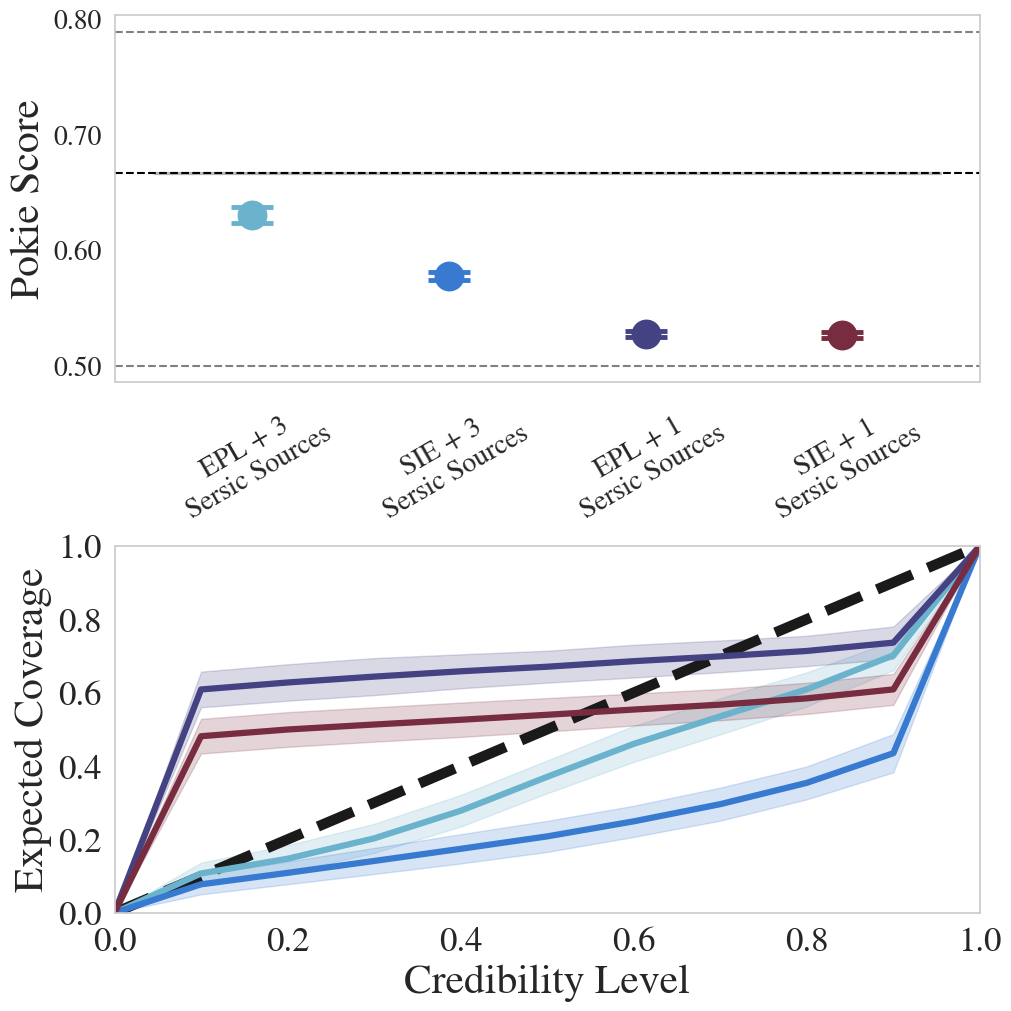

In [11]:
models = [
    "EPL + 3\nSersic Sources",
    "SIE + 3\nSersic Sources",
    "EPL + 1\nSersic Sources",
    "SIE + 1\nSersic Sources"
]
scores = [0.6302, 0.5779, 0.5277, 0.5266]
errors = [0.0072, 0.0035, 0.0027, 0.0027]


fig4, axes4 = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10), 
    # gridspec_kw={'hspace': 0.3}  # vertical spacing
)

left_ax4, right_ax4 = axes4

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    ax=left_ax4,
    ylabel='Pokie Score',
    xtick_labels=models,
    xtick_rotation=30,
    table_number='Model_Misspecification',
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    underconfidence_color=UNDERCONFIDENCE_COLOR,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=20,
    y_tick_size=20,
    markersize=18,
)

model_misspecification_data = np.load('model_misspecification_tarp_data.npz')
print(model_misspecification_data.files)
epl_3sersic_alpha = model_misspecification_data['EPL + 3 sources_alpha']
epl_3sersic_mean_ecp = model_misspecification_data['EPL + 3 sources_ecp_mean']
epl_3sersic_std_ecp = model_misspecification_data['EPL + 3 sources_ecp_std']
epl_1sersic_alpha = model_misspecification_data['EPL + 1 sources_alpha']
epl_1sersic_mean_ecp = model_misspecification_data['EPL + 1 sources_ecp_mean']
epl_1sersic_std_ecp = model_misspecification_data['EPL + 1 sources_ecp_std']
sie_3sersic_alpha = model_misspecification_data['SIE + 3 sources_alpha']
sie_3sersic_mean_ecp = model_misspecification_data['SIE + 3 sources_ecp_mean']
sie_3sersic_std_ecp = model_misspecification_data['SIE + 3 sources_ecp_std']
sie_1sersic_alpha = model_misspecification_data['SIE + 1 sources_alpha']
sie_1sersic_mean_ecp = model_misspecification_data['SIE + 1 sources_ecp_mean']
sie_1sersic_std_ecp = model_misspecification_data['SIE + 1 sources_ecp_std']

tarp_datasets = {
    "EPL + 3 Sersic": {
        "alpha": epl_3sersic_alpha,
        "ecp_mean": epl_3sersic_mean_ecp,
        "ecp_std": epl_3sersic_std_ecp
    },
    "SIE + 3 Sersic": {
        "alpha": sie_3sersic_alpha,
        "ecp_mean": sie_3sersic_mean_ecp,
        "ecp_std": sie_3sersic_std_ecp
    },
    "EPL + 1 Sersic": {
        "alpha": epl_1sersic_alpha,
        "ecp_mean": epl_1sersic_mean_ecp,
        "ecp_std": epl_1sersic_std_ecp
    },
    "SIE + 1 Sersic": {
        "alpha": sie_1sersic_alpha,
        "ecp_mean": sie_1sersic_mean_ecp,
        "ecp_std": sie_1sersic_std_ecp
    }
}

plot_validation_result(
    ax=right_ax4, 
    tarp_check=True, 
    tarp_datasets=tarp_datasets,
    data_colors_hex=data_colors_hex,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=25,
    y_tick_size=25,
    lw=4.5,
    legend_fontsize=15)

fig4.set_constrained_layout(True)
fig4.savefig('./PDF_Plots/Model_Misspecification_Result.pdf')
fig4.savefig('./PNG_Plots/Model_Misspecification_Result.png', dpi=300)

['posterior_1_ecp_mean', 'posterior_1_ecp_std', 'posterior_1_alpha', 'posterior_2_ecp_mean', 'posterior_2_ecp_std', 'posterior_2_alpha', 'posterior_3_ecp_mean', 'posterior_3_ecp_std', 'posterior_3_alpha', 'posterior_4_ecp_mean', 'posterior_4_ecp_std', 'posterior_4_alpha']


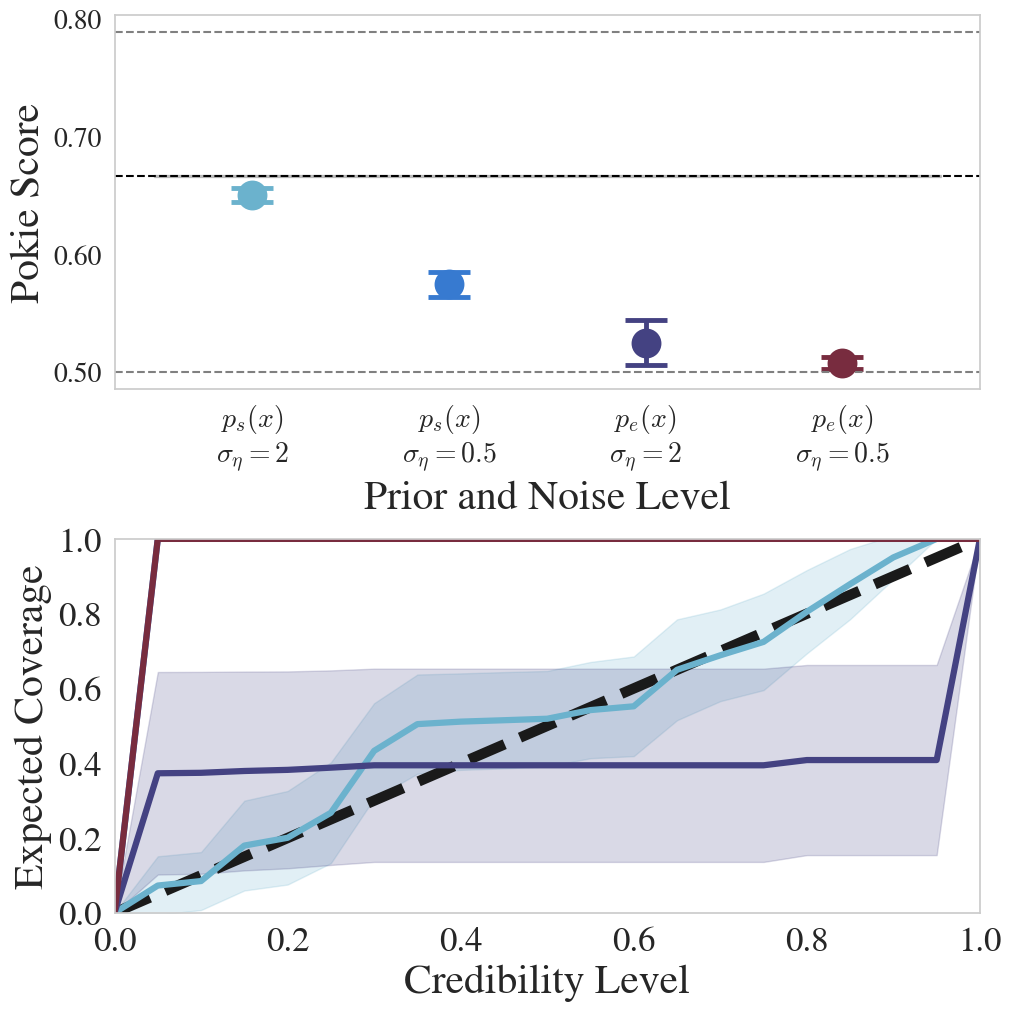

In [12]:
conditions = [
    r"$p_s(x)$" + "\n" + r"$\sigma_{\eta}=2$",
    r"$p_s(x)$" + "\n" + r"$\sigma_{\eta}=0.5$",
    r"$p_e(x)$" + "\n" + r"$\sigma_{\eta}=2$",
    r"$p_e(x)$" + "\n" + r"$\sigma_{\eta}=0.5$"
]
scores = [0.6502, 0.5745, 0.5248, 0.5076]
errors = [0.0059, 0.0105, 0.0191, 0.0050]


fig5, axes5 = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10), 
    # gridspec_kw={'hspace': 0.3}  # vertical spacing
)

left_ax5, right_ax5 = axes5

plot_scores_with_error_bars(
    x=range(len(conditions)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    ax=left_ax5,
    xlabel='Prior and Noise Level',
    ylabel='Pokie Score',
    xtick_labels=conditions,
    xtick_rotation=0,
    table_number='Table_Lensed_Images',
    bbox_x = 1.02,
    bbox_y = 0.87,
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    underconfidence_color=UNDERCONFIDENCE_COLOR,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=20,
    y_tick_size=20,
    markersize=18,
)

lensing_data = np.load('./Lensing_tarp_coverage_data.npz')
print(lensing_data.files)
posterior_1_ecp_mean = lensing_data['posterior_1_ecp_mean']
posterior_1_ecp_std = lensing_data['posterior_1_ecp_std']
posterior_1_alpha = lensing_data['posterior_1_alpha']
posterior_2_ecp_mean = lensing_data['posterior_2_ecp_mean']
posterior_2_ecp_std = lensing_data['posterior_2_ecp_std']
posterior_2_alpha = lensing_data['posterior_2_alpha']
posterior_3_ecp_mean = lensing_data['posterior_3_ecp_mean']
posterior_3_ecp_std = lensing_data['posterior_3_ecp_std']
posterior_3_alpha = lensing_data['posterior_3_alpha']
posterior_4_ecp_mean = lensing_data['posterior_4_ecp_mean']
posterior_4_ecp_std = lensing_data['posterior_4_ecp_std']
posterior_4_alpha = lensing_data['posterior_4_alpha']

tarp_datasets = {
    r"$p_s(x)$, $\sigma_{\eta}=2$": {
        "alpha": posterior_1_alpha,
        "ecp_mean": posterior_1_ecp_mean,
        "ecp_std": posterior_1_ecp_std
    },
    r"$p_s(x)$, $\sigma_{\eta}=0.5$": {
        "alpha": posterior_2_alpha,
        "ecp_mean": posterior_2_ecp_mean,
        "ecp_std": posterior_2_ecp_std
    },
    r"$p_e(x)$, $\sigma_{\eta}=2$": {
        "alpha": posterior_3_alpha,
        "ecp_mean": posterior_3_ecp_mean,
        "ecp_std": posterior_3_ecp_std
    },
    r"$p_e(x)$, $\sigma_{\eta}=0.5$": {
        "alpha": posterior_4_alpha,
        "ecp_mean": posterior_4_ecp_mean,
        "ecp_std": posterior_4_ecp_std
    }
}

plot_validation_result(
    ax=right_ax5, 
    tarp_check=True, 
    tarp_datasets=tarp_datasets,
    data_colors_hex=data_colors_hex,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=25,
    y_tick_size=25,
    lw=4.5,
    legend_fontsize=15,
    prior_misspecificatopn=True)

fig5.set_constrained_layout(True)
fig5.savefig('./PDF_Plots/Prior_and_Noise_Misspecification_Result.pdf')
fig5.savefig('./PNG_Plots/Prior_and_Noise_Misspecification_Result.png', dpi=300)

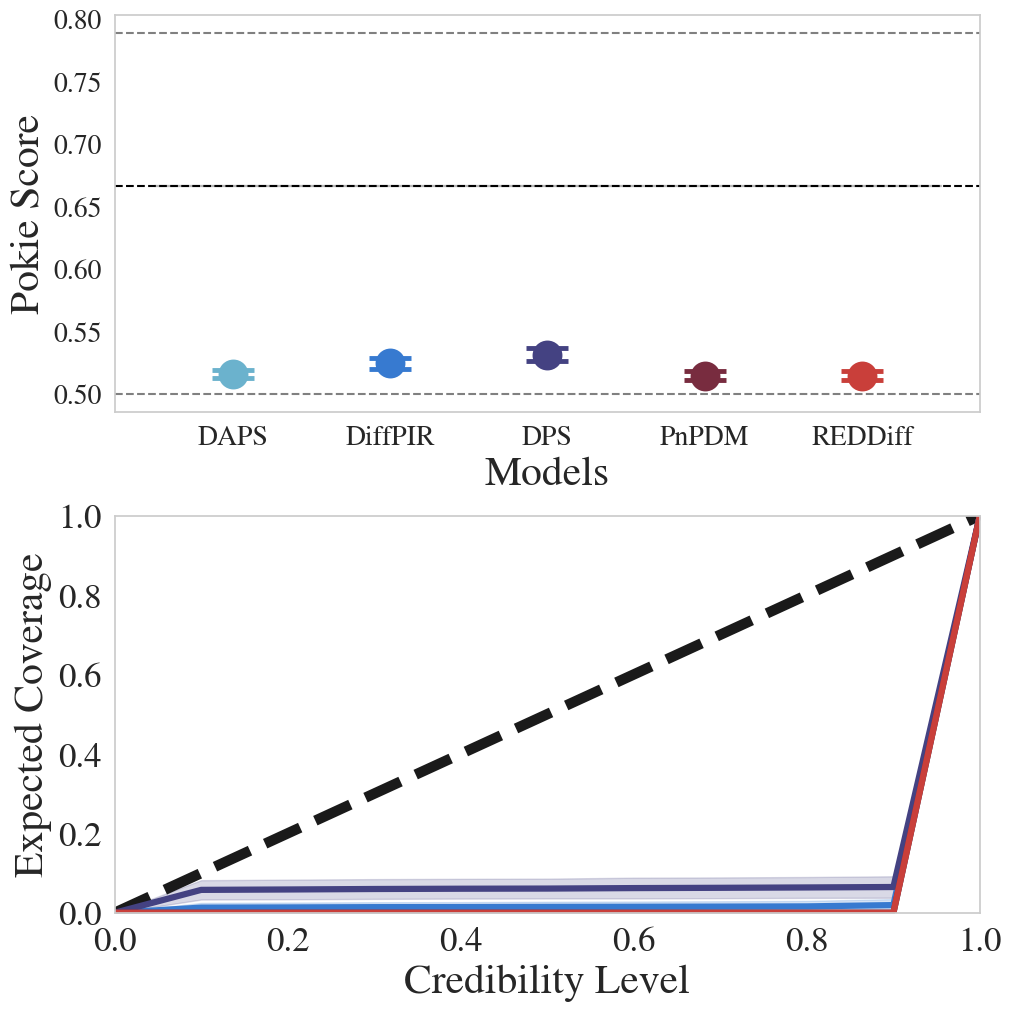

In [13]:
# InverseBench: Black Hole Imaging --> Turn off Legend in TARP plot

models = [
    "DAPS",
    "DiffPIR",
    "DPS",
    "PnPDM",
    "REDDiff"
]
scores = [0.5161, 0.5246, 0.5317, 0.5148, 0.5149]
errors = [0.0035, 0.0046, 0.0050, 0.0036, 0.0034]

fig6, axes6 = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10), 
    # gridspec_kw={'hspace': 0.3}  # vertical spacing
)

left_ax6, right_ax6 = axes6

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    ax=left_ax6,
    xlabel='Models',
    ylabel='Pokie Score',
    xtick_labels=models,
    xtick_rotation=0,
    table_number='Table_IB_Black_Hole_Imaging',
    bbox_x = 1.02,
    bbox_y = 0.87,
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    underconfidence_color=UNDERCONFIDENCE_COLOR,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=20,
    y_tick_size=20,
    markersize=18,
)

bh_tarp_data = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/DAPS_tarp_results.npz')
daps_alpha = bh_tarp_data['alpha']
daps_mean_ecp = bh_tarp_data['ecp_mean']
daps_std_ecp = bh_tarp_data['ecp_std']

bh_tarp_diffpir = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/DiffPIR_tarp_results.npz')
diffpir_alpha = bh_tarp_diffpir['alpha']
diffpir_mean_ecp = bh_tarp_diffpir['ecp_mean']
diffpir_std_ecp = bh_tarp_diffpir['ecp_std']

bh_tarp_dps = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/DPS_tarp_results.npz')
dps_alpha = bh_tarp_dps['alpha']
dps_mean_ecp = bh_tarp_dps['ecp_mean']
dps_std_ecp = bh_tarp_dps['ecp_std']

bh_tarp_pnpdm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/PnPDM_tarp_results.npz')
pnpdm_alpha = bh_tarp_pnpdm['alpha']
pnpdm_mean_ecp = bh_tarp_pnpdm['ecp_mean']
pnpdm_std_ecp = bh_tarp_pnpdm['ecp_std']

bh_tarp_reddiff = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Black_Hole_Imaging_Tarp_Data/REDDiff_tarp_results.npz')
reddiff_alpha = bh_tarp_reddiff['alpha']
reddiff_mean_ecp = bh_tarp_reddiff['ecp_mean']
reddiff_std_ecp = bh_tarp_reddiff['ecp_std']

tarp_datasets = {
    "DAPS": {
        "alpha": daps_alpha,
        "ecp_mean": daps_mean_ecp,
        "ecp_std": daps_std_ecp
    },
    "DiffPIR": {
        "alpha": diffpir_alpha,
        "ecp_mean": diffpir_mean_ecp,
        "ecp_std": diffpir_std_ecp
    },
    "DPS": {
        "alpha": dps_alpha,
        "ecp_mean": dps_mean_ecp,
        "ecp_std": dps_std_ecp
    },
    "PnPDM": {
        "alpha": pnpdm_alpha,
        "ecp_mean": pnpdm_mean_ecp,
        "ecp_std": pnpdm_std_ecp
    },
    "REDDiff": {
        "alpha": reddiff_alpha,
        "ecp_mean": reddiff_mean_ecp,
        "ecp_std": reddiff_std_ecp
    }
}

plot_validation_result(
    ax=right_ax6, 
    tarp_check=True, 
    tarp_datasets=tarp_datasets,
    data_colors_hex=data_colors_hex,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=25,
    y_tick_size=25,
    lw=4.5,
    legend_fontsize=15)

fig6.set_constrained_layout(True)
fig6.savefig('./PDF_Plots/InverseBench_BlackHoleImaging.pdf')
fig6.savefig('./PNG_Plots/InverseBench_BlackHoleImaging.png', dpi=300)


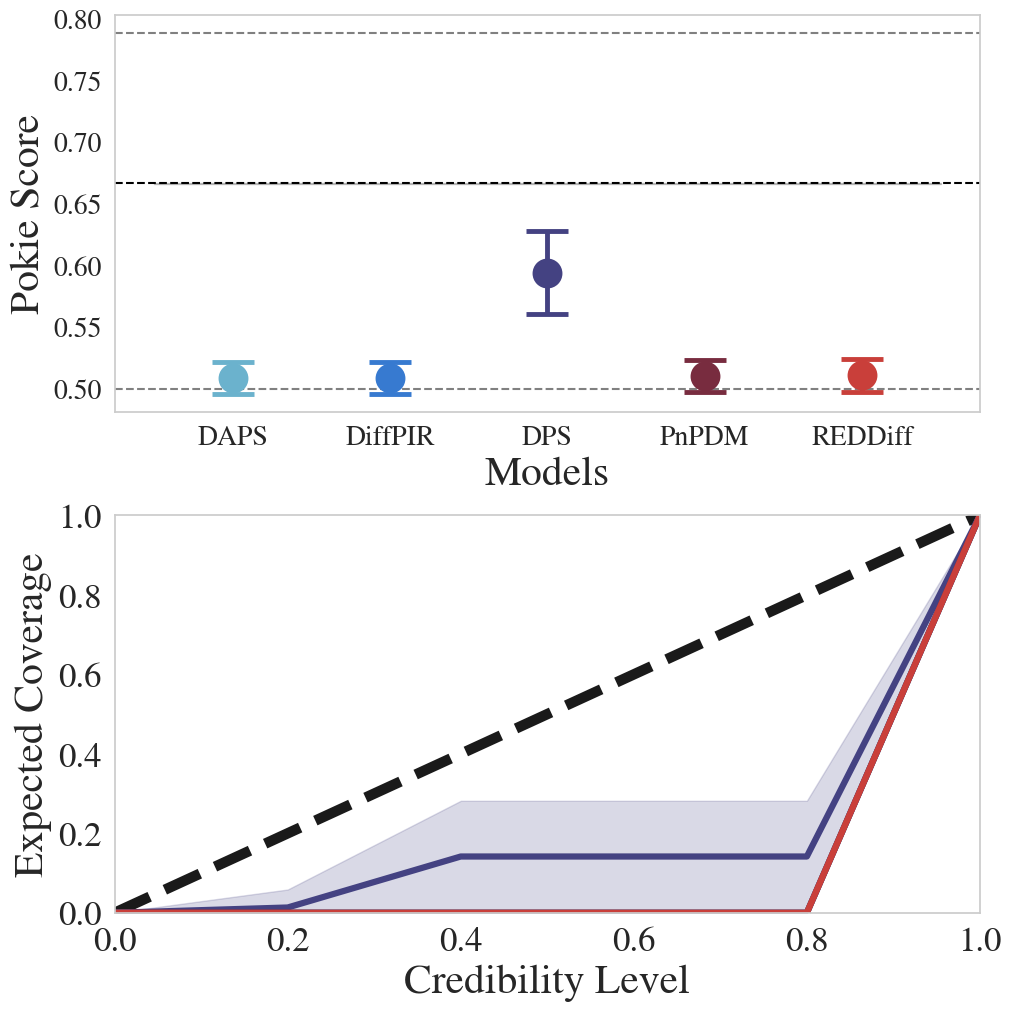

In [14]:
# InverseBench: Compressed Sensing MRI --> turn off legend in TARP

models = [
    "DAPS",
    "DiffPIR",
    "DPS",
    "PnPDM",
    "REDDiff"
]
scores = [0.5086, 0.5088, 0.5941, 0.5100, 0.5108]
errors = [0.0131, 0.0131, 0.0335, 0.0128, 0.0133]

fig6, axes6 = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10, 10), 
    # gridspec_kw={'hspace': 0.3}  # vertical spacing
)

left_ax6, right_ax6 = axes6

plot_scores_with_error_bars(
    x=range(len(models)),  # Use index for x-axis
    y=scores,
    yerr=errors,
    ax=left_ax6,
    xlabel='Models',
    ylabel='Pokie Score',
    xtick_labels=models,
    xtick_rotation=0,
    table_number='Table_IB_Black_Hole_Imaging',
    bbox_x = 1.02,
    bbox_y = 0.87,
    colors_hex=data_colors_hex,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    underconfidence_color=UNDERCONFIDENCE_COLOR,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=20,
    y_tick_size=20,
    markersize=18,
)
csmritarp_data = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DAPS_tarp_results.npz')
daps_alpha = csmritarp_data['alpha']
daps_mean_ecp = csmritarp_data['ecp_mean']
daps_std_ecp = csmritarp_data['ecp_std']

csmritarp_diffpir = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DiffPIR_tarp_results.npz')
diffpir_alpha = csmritarp_diffpir['alpha']
diffpir_mean_ecp = csmritarp_diffpir['ecp_mean']
diffpir_std_ecp = csmritarp_diffpir['ecp_std']

csmritarp_dps = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/DPS_tarp_results.npz')
dps_alpha = csmritarp_dps['alpha']
dps_mean_ecp = csmritarp_dps['ecp_mean']
dps_std_ecp = csmritarp_dps['ecp_std']

csmritarp_pnpdm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/PnPDM_tarp_results.npz')
pnpdm_alpha = csmritarp_pnpdm['alpha']
pnpdm_mean_ecp = csmritarp_pnpdm['ecp_mean']
pnpdm_std_ecp = csmritarp_pnpdm['ecp_std']

csmritarp_reddiff = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Compressed_Sensing_MRI_Tarp_Data/REDDiff_tarp_results.npz')
reddiff_alpha = csmritarp_reddiff['alpha']
reddiff_mean_ecp = csmritarp_reddiff['ecp_mean']
reddiff_std_ecp = csmritarp_reddiff['ecp_std']

tarp_datasets = {
    "DAPS": {
        "alpha": daps_alpha,
        "ecp_mean": daps_mean_ecp,
        "ecp_std": daps_std_ecp
    },
    "DiffPIR": {
        "alpha": diffpir_alpha,
        "ecp_mean": diffpir_mean_ecp,
        "ecp_std": diffpir_std_ecp
    },
    "DPS": {
        "alpha": dps_alpha,
        "ecp_mean": dps_mean_ecp,
        "ecp_std": dps_std_ecp
    },
    "PnPDM": {
        "alpha": pnpdm_alpha,
        "ecp_mean": pnpdm_mean_ecp,
        "ecp_std": pnpdm_std_ecp
    },
    "REDDiff": {
        "alpha": reddiff_alpha,
        "ecp_mean": reddiff_mean_ecp,
        "ecp_std": reddiff_std_ecp
    }
}
plot_validation_result(
    ax=right_ax6, 
    tarp_check=True, 
    tarp_datasets=tarp_datasets,
    data_colors_hex=data_colors_hex,
    x_label_size=30,
    y_label_size=30,
    x_tick_size=25,
    y_tick_size=25,
    lw=4.5,
    legend_fontsize=15)

fig6.set_constrained_layout(True)
fig6.savefig('./PDF_Plots/InverseBench_CompressedSensingMRI.pdf')
fig6.savefig('./PNG_Plots/InverseBench_CompressedSensingMRI.png', dpi=300)


In [15]:
# # InverseBench: Linear Inverse Scattering

# models = ["DPS", "REDDiff", "DiffPIR", "PnPDM", "DAPS", "DDRM", "DDNM", "PiGDM"]

# scores = [0.5096, 0.5097, 0.5102, 0.5102, 0.5099, 0.5102, 0.5097, 0.5102]
# errors = [0.0030, 0.0036, 0.0027, 0.0025, 0.0038, 0.0029, 0.0029, 0.0027]

# fig7, axes7 = plt.subplots(
#     nrows=2,
#     ncols=1,
#     figsize=(10, 10), 
#     # gridspec_kw={'hspace': 0.3}  # vertical spacing
# )

# left_ax7, right_ax7 = axes7

# plot_scores_with_error_bars(
#     x=range(len(models)),  # Use index for x-axis
#     y=scores,
#     yerr=errors,
#     ax=left_ax7,
#     xlabel='Models',
#     ylabel='Pokie Score',
#     xtick_labels=models,
#     xtick_rotation=45,
#     table_number='Table_IB_Black_Hole_Imaging',
#     bbox_x = 1.02,
#     bbox_y = 0.87,
#     colors_hex=data_colors_hex,
#     well_calibrated_color=WELL_CALIBRATED_COLOR,
#     poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
#     x_label_size=30,
#     y_label_size=30,
#     x_tick_size=20,
#     y_tick_size=20,
#     markersize=18,
# )

# csmritarp_data = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DAPS_tarp_results.npz')
# daps_alpha = csmritarp_data['alpha']
# daps_mean_ecp = csmritarp_data['ecp_mean']
# daps_std_ecp = csmritarp_data['ecp_std']

# csmritarp_ddrm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DDRM_tarp_results.npz')
# ddrm_alpha = csmritarp_ddrm['alpha']
# ddrm_mean_ecp = csmritarp_ddrm['ecp_mean']
# ddrm_std_ecp = csmritarp_ddrm['ecp_std']

# csmritarp_ddnm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DDNM_tarp_results.npz')
# ddnm_alpha = csmritarp_ddnm['alpha']
# ddnm_mean_ecp = csmritarp_ddnm['ecp_mean']
# ddnm_std_ecp = csmritarp_ddnm['ecp_std']

# csmritarp_pigdm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/PIGDM_tarp_results.npz')
# pigdm_alpha = csmritarp_pigdm['alpha']
# pigdm_mean_ecp = csmritarp_pigdm['ecp_mean']
# pigdm_std_ecp = csmritarp_pigdm['ecp_std']

# csmritarp_diffpir = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DiffPIR_tarp_results.npz')
# diffpir_alpha = csmritarp_diffpir['alpha']
# diffpir_mean_ecp = csmritarp_diffpir['ecp_mean']
# diffpir_std_ecp = csmritarp_diffpir['ecp_std']

# csmritarp_dps = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/DPS_tarp_results.npz')
# dps_alpha = csmritarp_dps['alpha']
# dps_mean_ecp = csmritarp_dps['ecp_mean']
# dps_std_ecp = csmritarp_dps['ecp_std']

# csmritarp_pnpdm = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/PnPDM_tarp_results.npz')
# pnpdm_alpha = csmritarp_pnpdm['alpha']
# pnpdm_mean_ecp = csmritarp_pnpdm['ecp_mean']
# pnpdm_std_ecp = csmritarp_pnpdm['ecp_std']

# csmritarp_reddiff = np.load('/Users/sammysharief/Downloads/ICLR_2026_Plots/InverseBench_Linear_Inverse_Scattering_Tarp_Data/REDDiff_tarp_results.npz')
# reddiff_alpha = csmritarp_reddiff['alpha']
# reddiff_mean_ecp = csmritarp_reddiff['ecp_mean']
# reddiff_std_ecp = csmritarp_reddiff['ecp_std']

# tarp_dataset = {
#     "DAPS": {
#         "alpha": daps_alpha,
#         "ecp_mean": daps_mean_ecp,
#         "ecp_std": daps_std_ecp
#     },
#     "DDRM": {
#         "alpha": ddrm_alpha,
#         "ecp_mean": ddrm_mean_ecp,
#         "ecp_std": ddrm_std_ecp
#     },
#     "DDNM": {
#         "alpha": ddnm_alpha,
#         "ecp_mean": ddnm_mean_ecp,
#         "ecp_std": ddnm_std_ecp
#     },
#     "PiGDM": {
#         "alpha": pigdm_alpha,
#         "ecp_mean": pigdm_mean_ecp,
#         "ecp_std": pigdm_std_ecp
#     },
#     "DiffPIR": {
#         "alpha": diffpir_alpha,
#         "ecp_mean": diffpir_mean_ecp,
#         "ecp_std": diffpir_std_ecp
#     },
#     "DPS": {
#         "alpha": dps_alpha,
#         "ecp_mean": dps_mean_ecp,
#         "ecp_std": dps_std_ecp
#     },
#     "PnPDM": {
#         "alpha": pnpdm_alpha,
#         "ecp_mean": pnpdm_mean_ecp,
#         "ecp_std": pnpdm_std_ecp
#     },
#     "REDDiff": {
#         "alpha": reddiff_alpha,
#         "ecp_mean": reddiff_mean_ecp,
#         "ecp_std": reddiff_std_ecp
#     }
# }


# plot_validation_result(
#     ax=right_ax7, 
#     tarp_check=True, 
#     tarp_datasets=tarp_datasets,
#     data_colors_hex=data_colors_hex,
#     x_label_size=30,
#     y_label_size=30,
#     x_tick_size=25,
#     y_tick_size=25,
#     lw=4.5,
#     legend_fontsize=15)

# fig7.set_constrained_layout(True)
# fig7.savefig('./PDF_Plots/InverseBench_LIS.pdf')
# fig7.savefig('./PNG_Plots/InverseBench_LIS.png', dpi=300)


In [ ]:
# Sensitivity Pokie Result

lr_10_posteriors = (
    [0.6677, 0.6378, 0.5657, 0.5569, 0.5547, 0.5495],
    [0.0179, 0.0172, 0.0095, 0.0079, 0.0090, 0.0102]
)

lr_50_posteriors = (
    [0.6638, 0.6433, 0.5679, 0.5589, 0.5548, 0.5521],
    [0.0077, 0.0103, 0.0046, 0.0049, 0.0034, 0.0039]
)

lr_100_posteriors = (
    [0.6687, 0.6416, 0.5661, 0.5583, 0.5546, 0.5514],
    [0.0057, 0.0059, 0.0034, 0.0031, 0.0032, 0.0026]
)

lr_500_posteriors = (
    [0.6664, 0.6434, 0.5674, 0.5593, 0.5551, 0.5522],
    [0.0026, 0.0032, 0.0018, 0.0015, 0.0015, 0.0012]
)

lr_1000_posteriors = (
    [0.6644, 0.6412, 0.5673, 0.5590, 0.5548, 0.5519],
    [0.0018, 0.0020, 0.0010, 0.0011, 0.0009, 0.0010]
)

# lr_5000_posteriors = (
#     [0.6643, 0.6409, 0.5670, 0.5590, 0.5549, 0.5519],
#     [0.0016, 0.0021, 0.0010, 0.0010, 0.0012, 0.0009]
# )

posteriors = {
    "LR=10": lr_10_posteriors,
    "LR=50": lr_50_posteriors,
    "LR=100": lr_100_posteriors,
    "LR=500": lr_500_posteriors,
    "LR=1000": lr_1000_posteriors,
    # "LR=5000": lr_5000_posteriors
}

# Make one figure
fig, ax = plt.subplots(figsize=(8, 5))

# Call your function for each metric
for i, (num_fiducials, (scores, errors)) in enumerate(posteriors.items()):
    print(f"Plotting: {num_fiducials} with scores: {scores} and errors: {errors}")
    plot_pokie_alone(
        x=np.arange(len(noise_levels)),
        y=scores,
        yerr=errors,
        ax=ax,  # same axis each time
        colors_hex=[data_colors_hex[i % len(data_colors_hex)]],  # pick 1 color
        xtick_labels=[str(nl) for nl in noise_levels],
        xtick_rotation=45,
        xlabel="Noise Level",
        ylabel="Pokie Score",
        table_number=f"Table_{i+1}",
        LR=False,
        well_calibrated_color=WELL_CALIBRATED_COLOR,
        poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
        underconfidence_color=UNDERCONFIDENCE_COLOR,
        title=None,
        x_label_size=30,
        y_label_size=30,
        x_tick_size=20,
        y_tick_size=20,
        markersize=12,
        capsize=10,  # Changed from 15 to 10
        markeredgewidth=2.5, # Changed from 3.5 to 1.5
        elinewidth=2.5, # Changed from 3.5 to 1.5
        model_name=num_fiducials,  # Pass metric name for legend
        legend_fontsize=20,
    )


fig.set_constrained_layout(True)
fig.savefig("./PDF_Plots/LR_Sensitivity_Pokie_Result.pdf")
fig.savefig("./PNG_Plots/LR_Sensitivity_Pokie_Result.png", dpi=300)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Distance Pokie Result
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

metrics = {
    "L2": (
        [0.6629, 0.6408, 0.5666, 0.5578, 0.5531, 0.5499],
        [0.0008, 0.0010, 0.0006, 0.0005, 0.0004, 0.0004]
    ),
    "L1": (
        [0.6633, 0.6430, 0.5770, 0.5684, 0.5627, 0.5582],
        [0.0009, 0.0008, 0.0006, 0.0005, 0.0005, 0.0005]
    ),
    "Chebyshev": (
        [0.6625, 0.6407, 0.5615, 0.5524, 0.5485, 0.5466],
        [0.0009, 0.0008, 0.0005, 0.0004, 0.0004, 0.0005]
    ),
    "Cosine": (
        [0.6604, 0.6475, 0.6099, 0.6000, 0.5929, 0.5871],
        [0.0008, 0.0010, 0.0011, 0.0012, 0.0013, 0.0010]
    ),
    "Minkowski": (
        [0.6647, 0.6413, 0.5623, 0.5537, 0.5497, 0.5473],
        [0.0008, 0.0009, 0.0005, 0.0004, 0.0004, 0.0004]
    )
}

# Make one figure
fig, ax = plt.subplots(figsize=(8, 5))

# Call your function for each metric
for i, (metric_name, (scores, errors)) in enumerate(metrics.items()):
    print(f"Plotting metric: {metric_name} with scores: {scores} and errors: {errors}")
    plot_pokie_alone(
        x=np.arange(len(noise_levels)),
        y=scores,
        yerr=errors,
        ax=ax,  # same axis each time
        colors_hex=[data_colors_hex[i % len(data_colors_hex)]],  # pick 1 color
        xtick_labels=[str(nl) for nl in noise_levels],
        xtick_rotation=45,
        xlabel="Noise Level",
        ylabel="Pokie Score",
        table_number=f"Table_{i+1}",
        LR=False,
        well_calibrated_color=WELL_CALIBRATED_COLOR,
        poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
        underconfidence_color=UNDERCONFIDENCE_COLOR,
        title=None,
        x_label_size=30,
        y_label_size=30,
        x_tick_size=20,
        y_tick_size=20,
        markersize=12,
        capsize=10,  # Changed from 15 to 10
        markeredgewidth=2.5, # Changed from 3.5 to 1.5
        elinewidth=2.5, # Changed from 3.5 to 1.5
        model_name=metric_name,  # Pass metric name for legend
        legend_fontsize=20,
    )


fig.set_constrained_layout(True)
fig.savefig("./PDF_Plots/Distance_Pokie_Result.pdf")
fig.savefig("./PNG_Plots/Distance_Pokie_Result.png", dpi=300)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Distribution Pokie Result
# Table Distribution_Choice
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

# Scores and 68% CI errors for each center distribution
distributions = {
    "Uniform": (
        [0.6638, 0.6408, 0.5665, 0.5577, 0.5530, 0.5499],
        [0.0009, 0.0007, 0.0005, 0.0004, 0.0004, 0.0004]
    ),
    "Normal": (
        [0.6641, 0.6401, 0.5535, 0.5414, 0.5348, 0.5306],
        [0.0007, 0.0008, 0.0005, 0.0004, 0.0004, 0.0004]
    ),
    "Beta(2,5)": (
        [0.6649, 0.6451, 0.5549, 0.5387, 0.5291, 0.5227],
        [0.0007, 0.0007, 0.0004, 0.0004, 0.0004, 0.0004]
    )
}

# Make one figure
fig, ax = plt.subplots(figsize=(8, 5))

# Call your function for each distribution
for i, (distribution_name, (scores, errors)) in enumerate(distributions.items()):
    print(f"Plotting distribution: {distribution_name} with scores: {scores} and errors: {errors}")
    plot_pokie_alone(
        x=np.arange(len(noise_levels)),
        y=scores,
        yerr=errors,
        ax=ax,  # same axis each time
        colors_hex=[data_colors_hex[i % len(data_colors_hex)]],  # pick 1 color
        xtick_labels=[str(nl) for nl in noise_levels],
        xtick_rotation=45,
        xlabel="Noise Level",
        ylabel="Pokie Score",
        table_number=f"Table_{i+1}",
        LR=False,
        well_calibrated_color=WELL_CALIBRATED_COLOR,
        poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
        underconfidence_color=UNDERCONFIDENCE_COLOR,
        title=None,
        x_label_size=30,
        y_label_size=30,
        x_tick_size=20,
        y_tick_size=20,
        markersize=12,
        capsize=10,  # Changed from 15 to 10
        markeredgewidth=2.5, # Changed from 3.5 to 1.5
        elinewidth=2.5, # Changed from 3.5 to 1.5
        model_name=distribution_name,  # Pass distribution name for legend
        legend_fontsize=20,
    )


fig.set_constrained_layout(True)
fig.savefig("./PDF_Plots/Center_Distribution_Pokie_Result.pdf")
fig.savefig("./PNG_Plots/Center_Distribution_Pokie_Result.png", dpi=300)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
# Ellipse Pokie Result
# Table Region_Choice (Ellipse Stretch Configurations)
noise_levels = [0.001, 0.010, 0.100, 0.150, 0.200, 0.250]

# Scores and errors by ellipse stretch configuration
ellipse_configs = {
    "(1.0, 2.0)": (
        [0.6663, 0.6519, 0.5801, 0.5649, 0.5557, 0.5494],
        [0.0013, 0.0013, 0.0009, 0.0008, 0.0007, 0.0006]
    ),
    "(0.5, 1.5)": (
        [0.6679, 0.6558, 0.5819, 0.5634, 0.5518, 0.5443],
        [0.0014, 0.0011, 0.0012, 0.0009, 0.0008, 0.0007]
    ),
    "(1.5, 1.0)": (
        [0.6629, 0.6359, 0.5509, 0.5419, 0.5376, 0.5347],
        [0.0011, 0.0010, 0.0007, 0.0006, 0.0005, 0.0006]
    ),
    "(2.0, 0.5)": (
        [0.6611, 0.6323, 0.5350, 0.5275, 0.5253, 0.5246],
        [0.0012, 0.0015, 0.0007, 0.0006, 0.0006, 0.0006]
    ),
    "(0.8, 1.2)": (
        [0.6656, 0.6474, 0.5773, 0.5660, 0.5593, 0.5547],
        [0.0011, 0.0012, 0.0007, 0.0006, 0.0006, 0.0006]
    )
}

# Make one figure
fig, ax = plt.subplots(figsize=(8, 5))

# Call your function for each distribution
for i, (shape_size, (scores, errors)) in enumerate(ellipse_configs.items()):
    print(f"Plotting shape size: {shape_size} with scores: {scores} and errors: {errors}")
    plot_pokie_alone(
        x=np.arange(len(noise_levels)),
        y=scores,
        yerr=errors,
        ax=ax,  # same axis each time
        colors_hex=[data_colors_hex[i % len(data_colors_hex)]],  # pick 1 color
        xtick_labels=[str(nl) for nl in noise_levels],
        xtick_rotation=45,
        xlabel="Noise Level",
        ylabel="Pokie Score",
        table_number=f"Table_{i+1}",
        LR=False,
        well_calibrated_color=WELL_CALIBRATED_COLOR,
        poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
        underconfidence_color=UNDERCONFIDENCE_COLOR,
        title=None,
        x_label_size=30,
        y_label_size=30,
        x_tick_size=20,
        y_tick_size=20,
        markersize=12,
        capsize=10,  # Changed from 15 to 10
        markeredgewidth=2.5, # Changed from 3.5 to 1.5
        elinewidth=2.5, # Changed from 3.5 to 1.5
        model_name=shape_size,  # Pass shape size for legend
        legend_fontsize=20,
    )


fig.set_constrained_layout(True)
fig.savefig("./PDF_Plots/Shape_Size_Pokie_Result.pdf")
fig.savefig("./PNG_Plots/Shape_Size_Pokie_Result.png", dpi=300)
plt.show()

NameError: name 'plt' is not defined

In [5]:
from torch import std


def plot_all_pokie_experiments(
    dimensions, 
    hyperspheres, 
    posterior_samples,
    shifts=None,
    colors_hex=None,
    xlabel_size=25,
    ylabel_size=25,
    xtick_size=20,
    ytick_size=20,
    markersize=12,
    capsize=10,
    markeredgewidth=2.5,
    elinewidth=2.5,
    legend_fontsize=15,
    well_calibrated_color=None,
    poorly_calibrated_color=None,
    underconfidence_color=None,
    save_path=None
):
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib as mpl
    from collections import OrderedDict

    if shifts is None:
        shifts = [-6, -3, 0, 3, 6]
    if colors_hex is None:
        # Fallback color set
        colors_hex = get_diverse_icefire_colors(10)[1]

    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    axs = axs.flatten()

    # Helper to plot each group
    def plot_group(ax, data, title, xlabel):
        ax.grid(False)
        for i, (label, values) in enumerate(data.items()):
            ax.errorbar(
                shifts,
                values["scores"],
                yerr=values["errors"],
                fmt='o',
                capsize=capsize,
                color=colors_hex[i % len(colors_hex)],
                markersize=markersize,
                alpha=1.0,
                markeredgewidth=markeredgewidth,
                elinewidth=elinewidth,
                label=label,
            )
        # Calibration lines
        std = 1/18/100
        if well_calibrated_color is not None:
            ax.axhline(2/3, color='black', linestyle='--', alpha = 1.0, lw=1.5, label='Well Calibrated')
            support = np.linspace(-6, 6, 100)
            ax.fill_between(support, 2/3 - std, 2/3 + std, alpha=0.2, color='black')
        if poorly_calibrated_color is not None:
            ax.axhline(1/2, color='gray', linestyle='--', alpha = 1.0, lw=1.5, label='Poorly Calibrated')
        if underconfidence_color is not None:
            ax.axhline((1/2 + 1/np.sqrt(12)), color='gray', linestyle='--', alpha = 1.0, lw=1.5, label='Underconfident')


        # Titles, labels, formatting
        ax.set_title(title, fontsize=25, fontweight='bold')
        ax.set_xlabel(xlabel, fontsize=xlabel_size)
        ax.set_ylabel("Pokie Score", fontsize=ylabel_size)
        ax.tick_params(axis='x', labelsize=xtick_size)
        ax.tick_params(axis='y', labelsize=ytick_size)

        # Set x ticks to shifts
        ax.set_xticks(shifts)
        formatter = mpl.ticker.FormatStrFormatter('%.2f')
        ax.yaxis.set_major_formatter(formatter)
        # ax.set_ylim(0.48, 0.68)

        # Deduplicated legend
        handles, labels = ax.get_legend_handles_labels()
        by_label = OrderedDict(zip(labels, handles))
        if 'Well Calibrated' in by_label:
            by_label.pop('Well Calibrated')
        if 'Poorly Calibrated' in by_label:
            by_label.pop('Poorly Calibrated')
        if 'Underconfident' in by_label:
            by_label.pop('Underconfident')
        ax.legend(
            by_label.values(),
            by_label.keys(),
            fontsize=legend_fontsize,
            loc="upper right"
        )

    # Apply to each subplot
    plot_group(axs[0], dimensions, "Varying Dimensions", "Shift Value")
    plot_group(axs[1], hyperspheres, "Varying Number of Hyperspheres", "Shift Value")
    plot_group(axs[2], posterior_samples, "Varying Posterior Samples", "Shift Value")
    axs[3].axis('off')

    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

In [6]:
# Sensitivity Test (2 x 2 plot with lower right turned off) Top Left: Dimensions Test, Top Right: L, Bottom Left: Num of Samples

dimensions = {
    "2D": {
        "scores": [0.5947, 0.6427, 0.6672, 0.6447, 0.5908],
        "errors": [0.0009, 0.0016, 0.0012, 0.0018, 0.0011]
    },
    "5D": {
        "scores": [0.5597, 0.6295, 0.6679, 0.6334, 0.5532],
        "errors": [0.0010, 0.0009, 0.0009, 0.0009, 0.0012]
    },
    "10D": {
        "scores": [0.5159, 0.6031, 0.6675, 0.6122, 0.5142],
        "errors": [0.0010, 0.0010, 0.0009, 0.0010, 0.0011]
    },
    "100D": {
        "scores": [0.5009, 0.5157, 0.6665, 0.5146, 0.5010],
        "errors": [0.0008, 0.0010, 0.0007, 0.0010, 0.0009]
    }
}

hyperspheres = {
    "1 run": {
        "scores": [0.4992, 0.5115, 0.6664, 0.5164, 0.5023],
        "errors": [0.0074, 0.0090, 0.0074, 0.0095, 0.0095]
    },
    "20 runs": {
        "scores": [0.5012, 0.5109, 0.6670, 0.5134, 0.5011],
        "errors": [0.0021, 0.0023, 0.0016, 0.0019, 0.0020]
    },
    "50 runs": {
        "scores": [0.5009, 0.5139, 0.6673, 0.5125, 0.5009],
        "errors": [0.0015, 0.0014, 0.0012, 0.0012, 0.0013]
    },
    "100 runs": {
        "scores": [0.5009, 0.5160, 0.6665, 0.5115, 0.5010],
        "errors": [0.0008, 0.0009, 0.0009, 0.0008, 0.0009]
    }
}

posterior_samples = {
    "10 samples": {
        "scores": [0.5499, 0.5671, 0.7048, 0.5564, 0.5498],
        "errors": [0.0009, 0.0008, 0.0009, 0.0010, 0.0009]
    },
    "50 samples": {
        "scores": [0.5100, 0.5194, 0.6724, 0.5234, 0.5099],
        "errors": [0.0008, 0.0008, 0.0009, 0.0011, 0.0011]
    },
    "100 samples": {
        "scores": [0.5050, 0.5170, 0.6691, 0.5152, 0.5050],
        "errors": [0.0009, 0.0010, 0.0008, 0.0010, 0.0010]
    },
    "200 samples": {
        "scores": [0.5025, 0.5119, 0.6680, 0.5156, 0.5026],
        "errors": [0.0010, 0.0009, 0.0008, 0.0011, 0.0009]
    },
    "300 samples": {
        "scores": [0.5018, 0.5086, 0.6678, 0.5092, 0.5018],
        "errors": [0.0009, 0.0009, 0.0008, 0.0009, 0.0009]
    },
    "400 samples": {
        "scores": [0.5012, 0.5123, 0.6668, 0.5114, 0.5013],
        "errors": [0.0009, 0.0011, 0.0009, 0.0011, 0.0008]
    },
    "500 samples": {
        "scores": [0.5010, 0.5127, 0.6673, 0.5099, 0.5009],
        "errors": [0.0009, 0.0009, 0.0008, 0.0009, 0.0009]
    }
}

'''
Colors
Legend
Size of Markers

'''

model_shifts = [-6, -3, 0, 3, 6]

plot_all_pokie_experiments(
    dimensions=dimensions,
    hyperspheres=hyperspheres,
    posterior_samples=posterior_samples,
    colors_hex=data_colors_hex,  # Your predefined color list
    xlabel_size=30,
    ylabel_size=30,
    xtick_size=20,
    ytick_size=20,
    markersize=12,
    capsize=10,
    markeredgewidth=2.5,
    elinewidth=2.5,
    legend_fontsize=20,
    well_calibrated_color=WELL_CALIBRATED_COLOR,
    poorly_calibrated_color=POORLY_CALIBRATED_COLOR,
    underconfidence_color=UNDERCONFIDENCE_COLOR,
    save_path="./PDF_Plots/Sensitivity_All_Experiments.pdf"
)


NameError: name 'data_colors_hex' is not defined